# Assignment Overview


## Background Story  

In the ever-evolving landscape of e-commerce, understanding customer behavior has become a cornerstone of strategic marketing. An emerging e-commerce giant, "FarTrend," has experienced rapid growth by offering a wide range of products from fashion to electronics, catering to over 3400 customers across diverse demographics. Despite their success, FarTrend faces challenges in personalizing marketing efforts and predicting future purchasing behavior, crucial for sustaining growth and enhancing customer satisfaction.

## The Challenge

FarTrend's extensive customer database reveals purchasing patterns over the past year but lacks actionable insights to anticipate the needs of new customers. Traditional marketing strategies have yielded moderate success; however, the leadership team believes that a more data-driven approach could unlock exponential growth.

You are working on the marketing intelligence team! Your goal is to develop a  machine learning model that segments FarTrend's customer base and predicts future purchases of new customers within their first year. This model aims to transform FarTrend approach to customer engagement by delivering personalized marketing campaigns and tailored product recommendations.

## Data Description

The IT extracted a dataframe with the main transaction performed by the customers.

##### Variables
InvoiceNo: Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name.

Quantity: The quantities of each product (item) per transaction.

InvoiceDate: The day and time when each transaction was generated.

UnitPrice: Product price per unit.

CustomerID: Unique customer number.

Country: The name of the country where each customer resides.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
file_path = r'C:\Users\guira\Downloads\FarTrend_eRetail.xlsx'
df = pd.read_excel(file_path)

df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

## Question 1: Data Quality and Customer Understanding (30 points)

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Summary statistics for numerical variables
df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

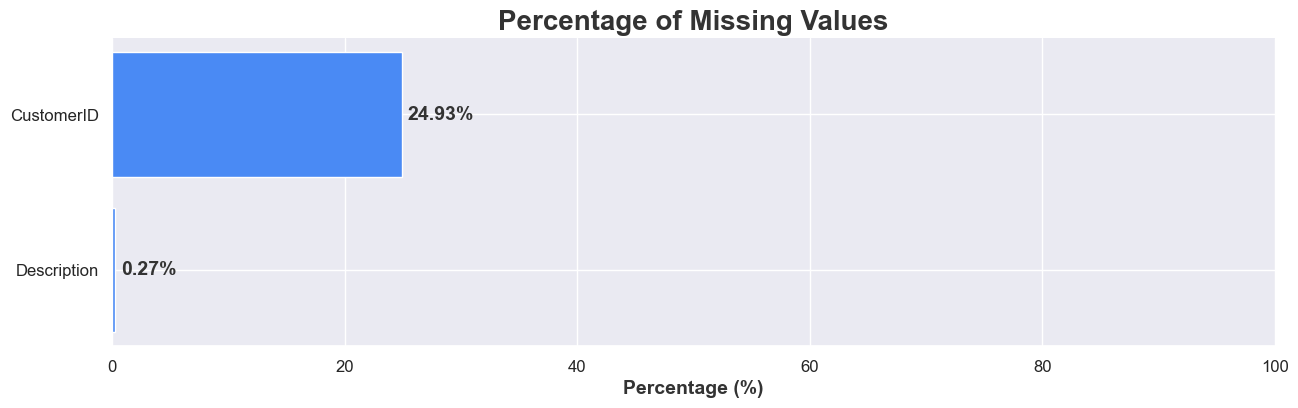

In [5]:
# Calculate the percentage of missing values for each column
def calculate_missing_percentage(df):
    missing_data = df.isnull().sum()
    missing_percentage = missing_data[missing_data > 0] / len(df) * 100
    return missing_percentage.sort_values(ascending=True)

# Plot the horizontal bar chart of missing values
def plot_missing_data_barh(missing_percentage):
    # Setup figure and axis
    fig, ax = plt.subplots(figsize=(15, 4))

    # Plotting
    bars = ax.barh(missing_percentage.index, missing_percentage, color='#4a8af4')

    # Annotating each bar with the percentage of missing data
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 0.5
        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:.2f}%",
                ha='left', va='center',
                fontweight='bold', fontsize=14, color='#333333')

    # Set the x-axis limits to accommodate the text labels
    ax.set_xlim(0, 100)

    # Styling the plot
    ax.set_title("Percentage of Missing Values", fontweight='bold', fontsize=20, color='#333333')
    ax.set_xlabel('Percentage (%)', fontsize=14, fontweight='bold', color='#333333')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    plt.show()

# Calculate missing data percentage
missing_percentage = calculate_missing_percentage(df)

# Plot the data
plot_missing_data_barh(missing_percentage)

In [6]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom

In [7]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

In [8]:
# Dropping the duplicates from the dataframe
df = df.drop_duplicates()

In [9]:
# Counting the number of records per column
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

In [10]:
# Checking the number of records with null values
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [11]:
# Dropping records with null values and counting the number of records per column to check integrity
df = df.dropna()
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

In [12]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

Quantity     UnitPrice
count   8872.000000   8872.000000
mean     -30.774910     18.899512
std     1172.249902    445.190864
min   -80995.000000      0.010000
25%       -6.000000      1.450000
50%       -2.000000      2.950000
75%       -1.000000      4.950000
max       -1.000000  38970.000000

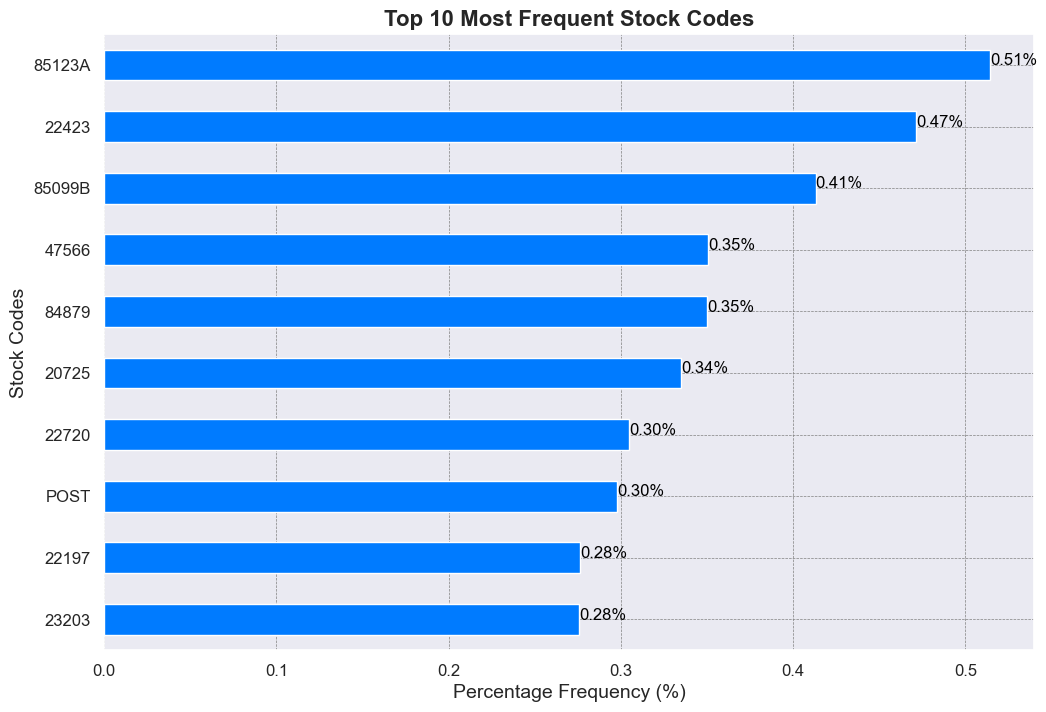

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 8)) # Changed size for better visibility
top_10_stock_codes.plot(kind='barh', color='#007bff') # Changed color to a shade of blue

# Adding the percentage frequency on the bars with updated font size and color
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index, f'{value:.2f}%', fontsize=12, color='black') # Changed vertical alignment, font size, and color

plt.title('Top 10 Most Frequent Stock Codes', fontsize=16, fontweight='bold') # Updated title formatting
plt.xlabel('Percentage Frequency (%)', fontsize=14) # Updated font size
plt.ylabel('Stock Codes', fontsize=14) # Updated font size
plt.gca().invert_yaxis() # Keeps the highest value on top
plt.xticks(fontsize=12) # Update x-tick font size
plt.yticks(fontsize=12) # Update y-tick font size
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey') # Add gridlines for better readability
plt.show()

In [14]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
dtype: int64


In [15]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

In [16]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [17]:
# Getting the number of rows in the dataframe
df.shape[0]

399689

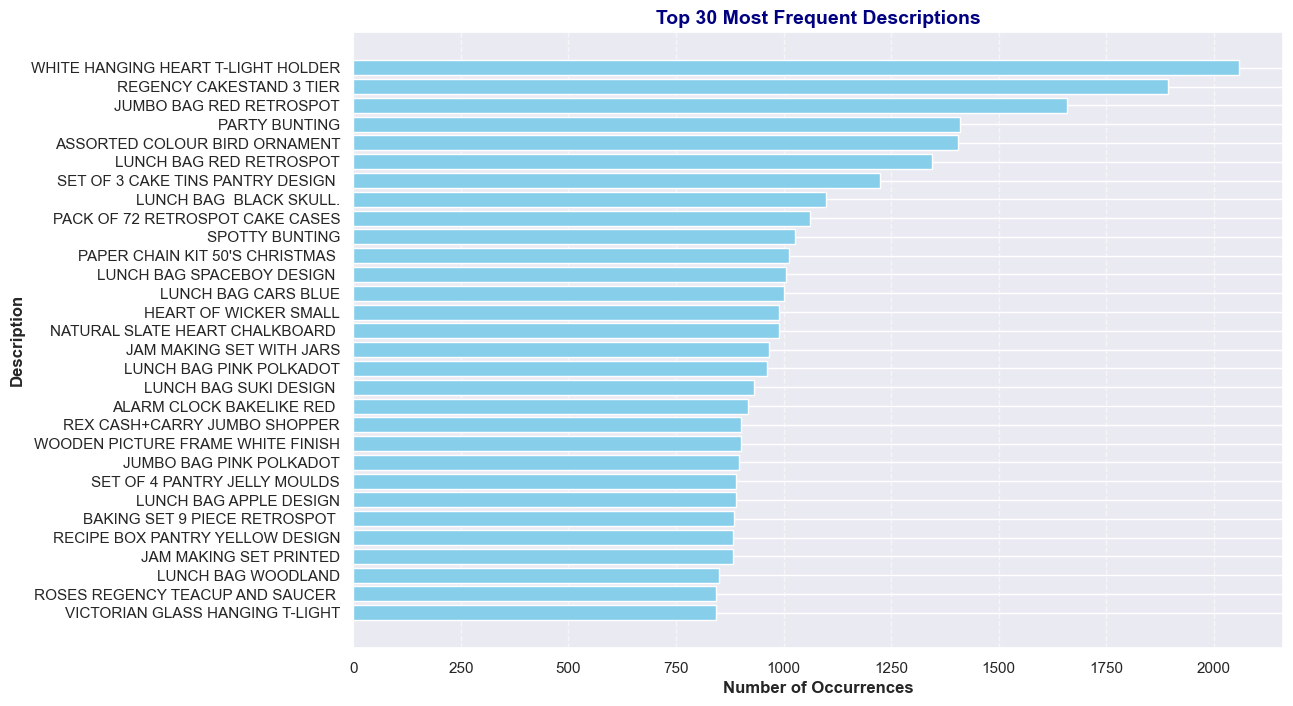

In [18]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='skyblue')

# Adding labels and title with updated font settings
plt.xlabel('Number of Occurrences', fontsize=12, fontweight='bold')
plt.ylabel('Description', fontsize=12, fontweight='bold')
plt.title('Top 30 Most Frequent Descriptions', fontsize=14, fontweight='bold', color='navy')

# Enhancing the plot with grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Optionally, you can also set the style of the plot for a different look and feel
plt.style.use('ggplot')

# Show the plot
plt.show()

In [19]:
# Find unique descriptions containing lowercase characters
lower_case_descriptions = df['Description'].unique()
lower_case_descriptions = [desc for desc in lower_case_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lower_case_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [20]:
df['UnitPrice'].describe()

count    399689.000000
mean          2.907457
std           4.451881
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [21]:
df[df['UnitPrice']==0].describe()[['Quantity']]

Quantity
count     33.000000
mean     420.515152
std     2176.713608
min        1.000000
25%        2.000000
50%       11.000000
75%       36.000000
max    12540.000000

In [22]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

In [23]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)
# Getting the number of rows in the dataframe
df.shape[0]

399656

In [24]:
df = df.copy()

# Convert 'CustomerID' to int
df.loc[:, 'CustomerID'] = df['CustomerID'].astype(int)

# Extracting new information from the 'InvoiceDate'
df.loc[:, 'InvoiceYear'] = df['InvoiceDate'].dt.year
df.loc[:, 'InvoiceMonth'] = df['InvoiceDate'].dt.month
df.loc[:, 'InvoiceDay'] = df['InvoiceDate'].dt.day
df.loc[:, 'InvoiceTime'] = df['InvoiceDate'].dt.time

# Convert 'StockCode' to string, ensuring NaN values are handled
df.loc[:, 'StockCode'] = df['StockCode'].astype(str)

# Assuming the filtering creates a new DataFrame that you want to modify:
df_filtered = df[df['StockCode'].str.match('^\d{5}$')].copy()

# Creating the 'InvoiceCanc' column on the filtered DataFrame
df_filtered.loc[:, 'InvoiceCanc'] = df_filtered['InvoiceNo'].str.startswith('C', na=False).astype(int)

# Create a new column based on condition
df_filtered['CountryUnspecified'] = np.where(df_filtered['Country'] != 'Unspecified', 0, 1)


df_filtered

C:\Users\guira\AppData\Local\Temp\ipykernel_10080\2891564002.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'CustomerID'] = df['CustomerID'].astype(int)


InvoiceNo StockCode                        Description  Quantity  \
1         536365     71053                WHITE METAL LANTERN         6   
5         536365     22752       SET 7 BABUSHKA NESTING BOXES         2   
6         536365     21730  GLASS STAR FROSTED T-LIGHT HOLDER         6   
7         536366     22633             HAND WARMER UNION JACK         6   
8         536366     22632          HAND WARMER RED POLKA DOT         6   
...          ...       ...                                ...       ...   
399651    581587     22613        PACK OF 20 SPACEBOY NAPKINS        12   
399652    581587     22899       CHILDREN'S APRON DOLLY GIRL          6   
399653    581587     23254      CHILDRENS CUTLERY DOLLY GIRL          4   
399654    581587     23255    CHILDRENS CUTLERY CIRCUS PARADE         4   
399655    581587     22138      BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
1      2010-12-01 08:26:00       3.39       17850  United Kingdom   
5      2010-12-01 08:26:00       7.65       17850  United Kingdom   
6      2010-12-01 08:26:00       4.25       17850  United Kingdom   
7      2010-12-01 08:28:00       1.85       17850  United Kingdom   
8      2010-12-01 08:28:00       1.85       17850  United Kingdom   
...                    ...        ...         ...             ...   
399651 2011-12-09 12:50:00       0.85       12680          France   
399652 2011-12-09 12:50:00       2.10       12680          France   
399653 2011-12-09 12:50:00       4.15       12680          France   
399654 2011-12-09 12:50:00       4.15       12680          France   
399655 2011-12-09 12:50:00       4.95       12680          France   

       Transaction_Status  InvoiceYear  InvoiceMonth  InvoiceDay InvoiceTime  \
1               Completed         2010            12           1    08:26:00   
5               Completed         2010            12           1    08:26:00   
6               Completed         2010            12           1    08:26:00   
7               Completed         2010            12           1    08:28:00   
8               Completed         2010            12           1    08:28:00   
...                   ...          ...           ...         ...         ...   
399651          Completed         2011            12           9    12:50:00   
399652          Completed         2011            12           9    12:50:00   
399653          Completed         2011            12           9    12:50:00   
399654          Completed         2011            12           9    12:50:00   
399655          Completed         2011            12           9    12:50:00   

        InvoiceCanc  CountryUnspecified  
1                 0                   0  
5                 0                   0  
6                 0                   0  
7                 0                   0  
8                 0                   0  
...             ...                 ...  
399651            0                   0  
399652            0                   0  
399653            0                   0  
399654            0                   0  
399655            0                   0  

[366147 rows x 15 columns]

In [25]:
df_not_cancelled = df_filtered[df_filtered['InvoiceCanc'] == 0]

# Group the filtered data by CustomerID
grouped = df_not_cancelled.groupby('CustomerID')

# Calculate total quantity of items purchased per customer from non-cancelled orders
total_quantity_per_customer = grouped['Quantity'].sum()

# Calculate total spending per customer from non-cancelled orders (Quantity * UnitPrice)
total_spending_per_customer = grouped.apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Calculate the number of unique invoices per customer from non-cancelled orders
unique_invoices_per_customer = grouped['InvoiceNo'].nunique()

aggregated_data = grouped.agg(
    TotalQuantity=('Quantity', 'sum'),
    AverageUnitPrice=('UnitPrice', 'mean'),
    MedianQuantity=('Quantity', 'median'),
    MedianUnitPrice=('UnitPrice', 'median'),
    UniqueInvoices=('InvoiceNo', 'nunique'),
    MaxQuantity=('Quantity', 'max'),
    MinQuantity=('Quantity', 'min'),
    MaxUnitPrice=('UnitPrice', 'max'),
    MinUnitPrice=('UnitPrice', 'min')
)

# Group the filtered data by CustomerID and then count unique StockCodes within each group, for non-cancelled orders
unique_items_per_customer = df_not_cancelled.groupby('CustomerID')['StockCode'].nunique()

print("Total Quantity per Customer:")
print(total_quantity_per_customer)

print("\nTotal Spending per Customer:")
print(total_spending_per_customer)

print("\nUnique Invoices per Customer:")
print(unique_invoices_per_customer)

print("\nAggregated Data per Customer:")
print(aggregated_data)

print("\nUnique Items per Customer:")
print(unique_items_per_customer)

Total Quantity per Customer:
CustomerID
12346    74215
12347     2137
12348     2332
12349      611
12350      168
         ...  
18280       45
18281       54
18282      103
18283     1302
18287     1208
Name: Quantity, Length: 4314, dtype: int64

Total Spending per Customer:
CustomerID
12346    77183.60
12347     3653.45
12348     1437.24
12349     1372.42
12350      258.00
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     1918.24
18287     1220.06
Length: 4314, dtype: float64

Unique Invoices per Customer:
CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4314, dtype: int64

Aggregated Data per Customer:
            TotalQuantity  AverageUnitPrice  MedianQuantity  MedianUnitPrice  \
CustomerID                                                                     
12346               74215          1.040000         74215.0            1.04

In [26]:
# Group the filtered data by Country
grouped_by_country = df_not_cancelled.groupby('Country')

# Calculate total quantity of items purchased per country from non-cancelled orders
total_quantity_per_country = grouped_by_country['Quantity'].sum()

# Calculate total spending per country from non-cancelled orders (Quantity * UnitPrice)
total_spending_per_country = grouped_by_country.apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Calculate the number of unique invoices per country from non-cancelled orders
unique_invoices_per_country = grouped_by_country['InvoiceNo'].nunique()

# Aggregate various statistics per country
aggregated_data_per_country = grouped_by_country.agg(
    TotalQuantity=('Quantity', 'sum'),
    AverageUnitPrice=('UnitPrice', 'mean'),
    MedianQuantity=('Quantity', 'median'),
    MedianUnitPrice=('UnitPrice', 'median'),
    UniqueInvoices=('InvoiceNo', 'nunique'),
    MaxQuantity=('Quantity', 'max'),
    MinQuantity=('Quantity', 'min'),
    MaxUnitPrice=('UnitPrice', 'max'),
    MinUnitPrice=('UnitPrice', 'min')
)

# Group the filtered data by Country and then count unique StockCodes within each group, for non-cancelled orders
unique_items_per_country = df_not_cancelled.groupby('Country')['StockCode'].nunique()

print("Total Quantity per Country:")
print(total_quantity_per_country)

print("\nTotal Spending per Country:")
print(total_spending_per_country)

print("\nUnique Invoices per Country:")
print(unique_invoices_per_country)

print("\nAggregated Data per Country:")
print(aggregated_data_per_country)

print("\nUnique Items per Country:")
print(unique_items_per_country)

Total Quantity per Country:
Country
Australia                 81777
Austria                    4601
Bahrain                     230
Belgium                   21139
Brazil                      323
Canada                     2399
Channel Islands            8581
Cyprus                     5690
Czech Republic              598
Denmark                    7641
EIRE                     131078
European Community          446
Finland                    8503
France                   106389
Germany                  111532
Greece                     1482
Iceland                    2137
Israel                     3663
Italy                      7158
Japan                     25356
Lebanon                     374
Lithuania                   580
Malta                       812
Netherlands              192799
Norway                    17765
Poland                     3484
Portugal                  15036
RSA                         330
Saudi Arabia                 80
Singapore                  5008
Spai

In [27]:
df_cancelled = df_filtered[df_filtered['InvoiceCanc'] == 1]

# Group the filtered data by CustomerID
grouped_cancelled = df_cancelled.groupby('CustomerID')

# Calculate total quantity of items for cancelled orders per customer
total_quantity_per_customer_cancelled = grouped_cancelled['Quantity'].sum()

# Calculate total spending per customer for cancelled orders (Quantity * UnitPrice)
total_spending_per_customer_cancelled = grouped_cancelled.apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Calculate the number of unique invoices per customer for cancelled orders
unique_invoices_per_customer_cancelled = grouped_cancelled['InvoiceNo'].nunique()

aggregated_data_cancelled = grouped_cancelled.agg(
    TotalQuantityCancelled=('Quantity', 'sum'),
    AverageUnitPriceCancelled=('UnitPrice', 'mean'),
    MedianQuantityCancelled=('Quantity', 'median'),
    MedianUnitPriceCancelled=('UnitPrice', 'median'),
    UniqueInvoicesCancelled=('InvoiceNo', 'nunique'),
    MaxQuantityCancelled=('Quantity', 'max'),  # Maximum Quantity for cancelled orders
    MinQuantityCancelled=('Quantity', 'min'),  # Minimum Quantity for cancelled orders
    MaxUnitPriceCancelled=('UnitPrice', 'max'),  # Maximum Unit Price for cancelled orders
    MinUnitPriceCancelled=('UnitPrice', 'min')  # Minimum Unit Price for cancelled orders
)

# Group the filtered data by CustomerID and then count unique StockCodes within each group, for cancelled orders
unique_items_per_customer_cancelled = df_cancelled.groupby('CustomerID')['StockCode'].nunique()
print("Total Quantity per Customer (Cancelled Orders):")
print(total_quantity_per_customer_cancelled)

print("\nTotal Spending per Customer (Cancelled Orders):")
print(total_spending_per_customer_cancelled)

print("\nUnique Invoices per Country (Cancelled Orders):")
print(unique_invoices_per_customer_cancelled)

print("\nAggregated Data per Country (Cancelled Orders):")
print(aggregated_data_cancelled)

print("\nUnique Items per Country (Cancelled Orders):")
print(unique_items_per_customer_cancelled)

Total Quantity per Customer (Cancelled Orders):
CustomerID
12346   -74215
12352      -63
12359      -10
12362      -17
12379       -1
         ...  
18272       -6
18274      -84
18276       -2
18277       -1
18282       -5
Name: Quantity, Length: 1477, dtype: int64

Total Spending per Customer (Cancelled Orders):
CustomerID
12346   -77183.60
12352     -120.33
12359     -127.05
12362      -71.65
12379       -1.95
           ...   
18272      -13.80
18274     -160.92
18276      -12.50
18277      -12.75
18282       -1.45
Length: 1477, dtype: float64

Unique Invoices per Country (Cancelled Orders):
CustomerID
12346    1
12352    1
12359    2
12362    3
12379    1
        ..
18272    1
18274    1
18276    2
18277    1
18282    1
Name: InvoiceNo, Length: 1477, dtype: int64

Aggregated Data per Country (Cancelled Orders):
            TotalQuantityCancelled  AverageUnitPriceCancelled  \
CustomerID                                                      
12346                       -74215        

In [28]:
# Group the filtered data by Country
grouped_by_country_cancelled = df_cancelled.groupby('Country')

# Calculate total quantity of items purchased per country from canceled orders
total_quantity_per_country_cancelled = grouped_by_country_cancelled['Quantity'].sum()

# Calculate total spending per country from canceled orders (Quantity * UnitPrice)
total_spending_per_country_cancelled = grouped_by_country_cancelled.apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

# Calculate the number of unique invoices per country from canceled orders
unique_invoices_per_country_cancelled = grouped_by_country_cancelled['InvoiceNo'].nunique()

# Aggregate various statistics per country for canceled orders
aggregated_data_per_country_cancelled = grouped_by_country_cancelled.agg(
    TotalQuantity=('Quantity', 'sum'),
    AverageUnitPrice=('UnitPrice', 'mean'),
    MedianQuantity=('Quantity', 'median'),
    MedianUnitPrice=('UnitPrice', 'median'),
    UniqueInvoices=('InvoiceNo', 'nunique'),
    MaxQuantity=('Quantity', 'max'),
    MinQuantity=('Quantity', 'min'),
    MaxUnitPrice=('UnitPrice', 'max'),
    MinUnitPrice=('UnitPrice', 'min')
)

# Group the filtered data by Country and then count unique StockCodes within each group, for canceled orders
unique_items_per_country_cancelled = df_cancelled.groupby('Country')['StockCode'].nunique()

print("Total Quantity per Country (Cancelled Orders):")
print(total_quantity_per_country_cancelled)

print("\nTotal Spending per Country (Cancelled Orders):")
print(total_spending_per_country_cancelled)

print("\nUnique Invoices per Country (Cancelled Orders):")
print(unique_invoices_per_country_cancelled)

print("\nAggregated Data per Country (Cancelled Orders):")
print(aggregated_data_per_country_cancelled)

print("\nUnique Items per Country (Cancelled Orders):")
print(unique_items_per_country_cancelled)

Total Quantity per Country (Cancelled Orders):
Country
Australia               -554
Austria                  -54
Belgium                  -79
Channel Islands          -11
Cyprus                   -10
Czech Republic           -30
Denmark                  -21
EIRE                   -3894
European Community        -2
Finland                  -32
France                 -1532
Germany                -1741
Israel                   -56
Italy                   -107
Japan                   -795
Malta                    -17
Netherlands             -312
Norway                   -87
Poland                   -31
Portugal                 -68
Saudi Arabia              -5
Spain                   -564
Sweden                  -203
Switzerland             -293
USA                    -1345
United Kingdom       -244486
Name: Quantity, dtype: int64

Total Spending per Country (Cancelled Orders):
Country
Australia              -1179.23
Austria                  -44.36
Belgium                 -249.53
Channel Is

In [29]:
# Checking if the dataset contains any rows with 0. If it was, the rows containing 0 should be deleted because they can't be count as transactions
zero_quantity = df_filtered[df_filtered['Quantity']== 0]
zero_quantity

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Transaction_Status, InvoiceYear, InvoiceMonth, InvoiceDay, InvoiceTime, InvoiceCanc, CountryUnspecified]
Index: []

C:\Users\guira\AppData\Local\Temp\ipykernel_10080\4179044840.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d= df_filtered.corr()


Quantity  UnitPrice  CustomerID  InvoiceYear  \
Quantity            1.000000  -0.012803   -0.003230     0.000836   
UnitPrice          -0.012803   1.000000   -0.007218    -0.012193   
CustomerID         -0.003230  -0.007218    1.000000    -0.032461   
InvoiceYear         0.000836  -0.012193   -0.032461     1.000000   
InvoiceMonth       -0.002426  -0.026923    0.029501    -0.334691   
InvoiceDay         -0.000294  -0.001928   -0.000912     0.165544   
InvoiceCanc        -0.025447   0.052408   -0.026238    -0.008635   
CountryUnspecified -0.000425   0.002317   -0.021115     0.006358   

                    InvoiceMonth  InvoiceDay  InvoiceCanc  CountryUnspecified  
Quantity               -0.002426   -0.000294    -0.025447           -0.000425  
UnitPrice              -0.026923   -0.001928     0.052408            0.002317  
CustomerID              0.029501   -0.000912    -0.026238           -0.021115  
InvoiceYear            -0.334691    0.165544    -0.008635            0.006358  
InvoiceMonth            1.000000   -0.118744    -0.012579           -0.008645  
InvoiceDay             -0.118744    1.000000    -0.005235            0.017389  
InvoiceCanc            -0.012579   -0.005235     1.000000           -0.003617  
CountryUnspecified     -0.008645    0.017389    -0.003617            1.000000

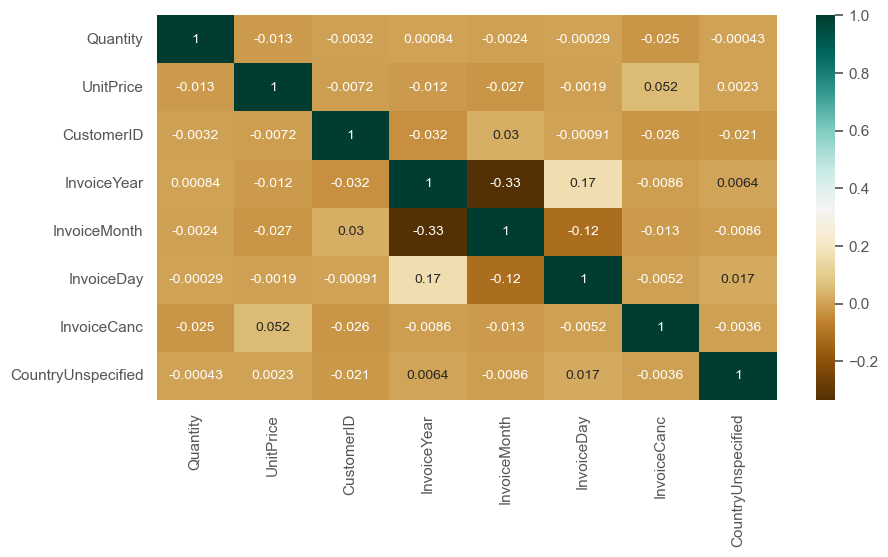

In [30]:
plt.figure(figsize=(10,5))
d= df_filtered.corr()
sns.heatmap(d,cmap="BrBG",annot=True)
d

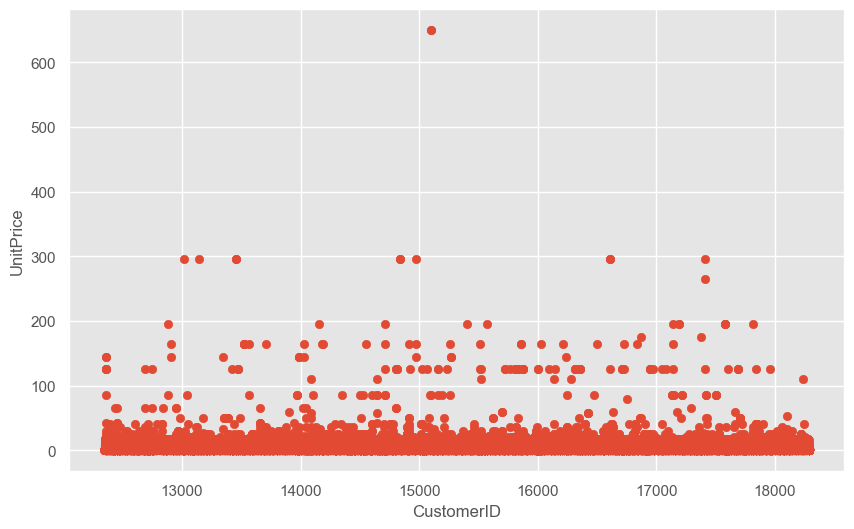

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_filtered['CustomerID'], df_filtered['UnitPrice'])
ax.set_xlabel('CustomerID')
ax.set_ylabel('UnitPrice')
plt.show()

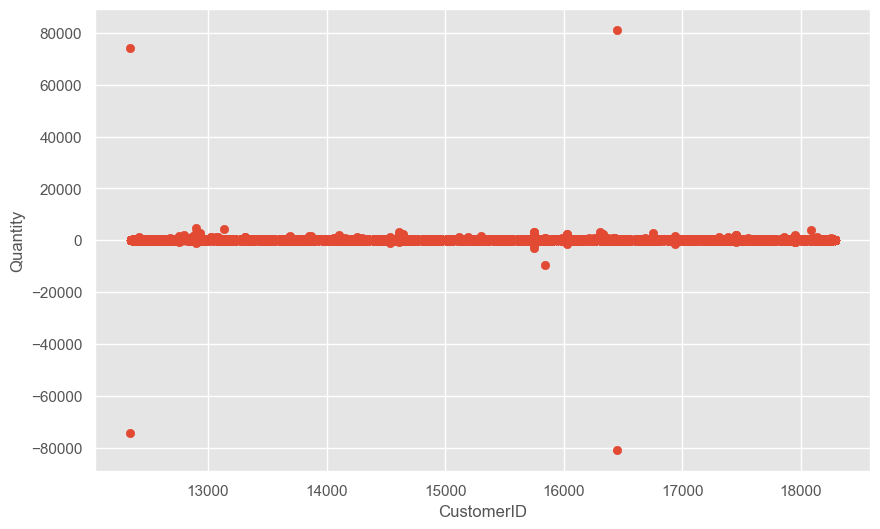

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_filtered['CustomerID'], df_filtered['Quantity'])
ax.set_xlabel('CustomerID')
ax.set_ylabel('Quantity')
plt.show()

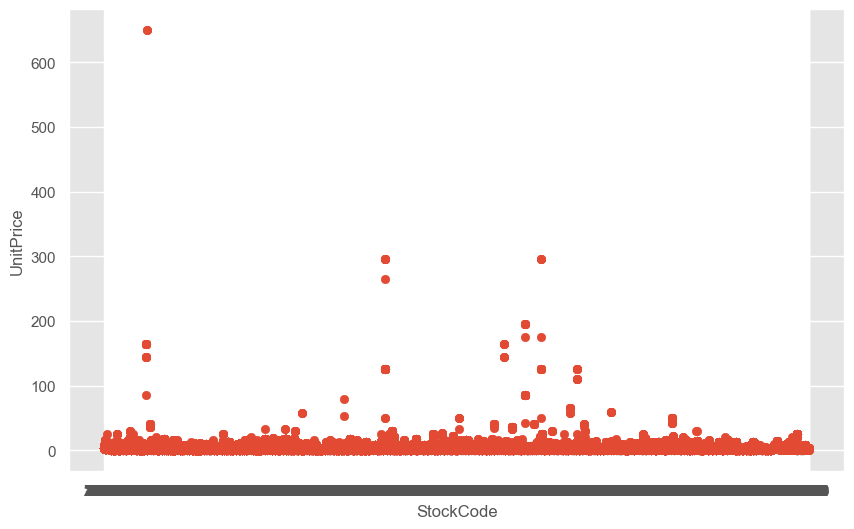

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_filtered['StockCode'], df_filtered['UnitPrice'])
ax.set_xlabel('StockCode')
ax.set_ylabel('UnitPrice')
plt.show()

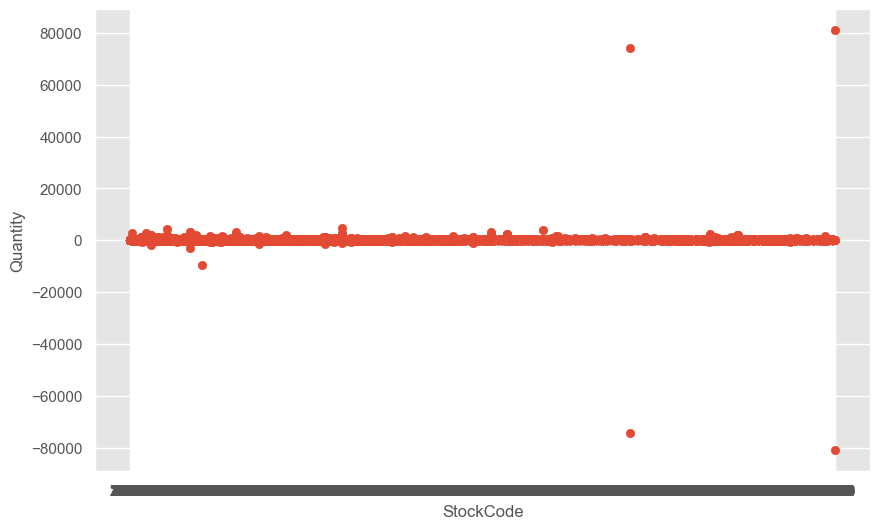

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_filtered['StockCode'], df_filtered['Quantity'])
ax.set_xlabel('StockCode')
ax.set_ylabel('Quantity')
plt.show()

<Axes: xlabel='Quantity'>

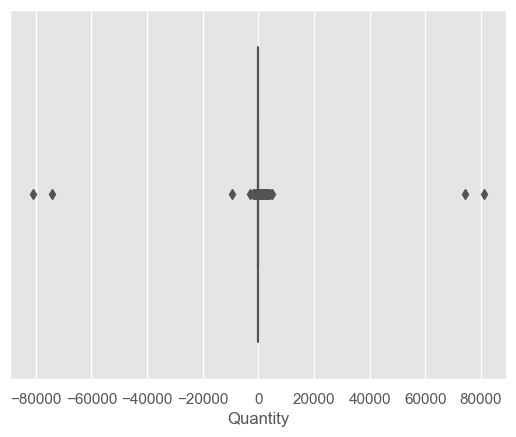

In [35]:
sns.boxplot(x=df_filtered['Quantity'])

<Axes: xlabel='UnitPrice'>

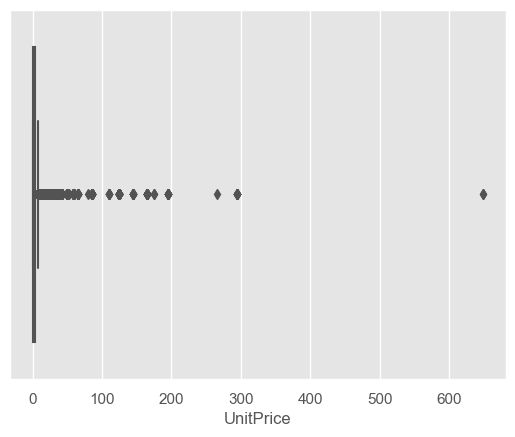

In [36]:
sns.boxplot(x=df_filtered['UnitPrice'])

In [37]:
df_filtered

InvoiceNo StockCode                        Description  Quantity  \
1         536365     71053                WHITE METAL LANTERN         6   
5         536365     22752       SET 7 BABUSHKA NESTING BOXES         2   
6         536365     21730  GLASS STAR FROSTED T-LIGHT HOLDER         6   
7         536366     22633             HAND WARMER UNION JACK         6   
8         536366     22632          HAND WARMER RED POLKA DOT         6   
...          ...       ...                                ...       ...   
399651    581587     22613        PACK OF 20 SPACEBOY NAPKINS        12   
399652    581587     22899       CHILDREN'S APRON DOLLY GIRL          6   
399653    581587     23254      CHILDRENS CUTLERY DOLLY GIRL          4   
399654    581587     23255    CHILDRENS CUTLERY CIRCUS PARADE         4   
399655    581587     22138      BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
1      2010-12-01 08:26:00       3.39       17850  United Kingdom   
5      2010-12-01 08:26:00       7.65       17850  United Kingdom   
6      2010-12-01 08:26:00       4.25       17850  United Kingdom   
7      2010-12-01 08:28:00       1.85       17850  United Kingdom   
8      2010-12-01 08:28:00       1.85       17850  United Kingdom   
...                    ...        ...         ...             ...   
399651 2011-12-09 12:50:00       0.85       12680          France   
399652 2011-12-09 12:50:00       2.10       12680          France   
399653 2011-12-09 12:50:00       4.15       12680          France   
399654 2011-12-09 12:50:00       4.15       12680          France   
399655 2011-12-09 12:50:00       4.95       12680          France   

       Transaction_Status  InvoiceYear  InvoiceMonth  InvoiceDay InvoiceTime  \
1               Completed         2010            12           1    08:26:00   
5               Completed         2010            12           1    08:26:00   
6               Completed         2010            12           1    08:26:00   
7               Completed         2010            12           1    08:28:00   
8               Completed         2010            12           1    08:28:00   
...                   ...          ...           ...         ...         ...   
399651          Completed         2011            12           9    12:50:00   
399652          Completed         2011            12           9    12:50:00   
399653          Completed         2011            12           9    12:50:00   
399654          Completed         2011            12           9    12:50:00   
399655          Completed         2011            12           9    12:50:00   

        InvoiceCanc  CountryUnspecified  
1                 0                   0  
5                 0                   0  
6                 0                   0  
7                 0                   0  
8                 0                   0  
...             ...                 ...  
399651            0                   0  
399652            0                   0  
399653            0                   0  
399654            0                   0  
399655            0                   0  

[366147 rows x 15 columns]

Exploratory Data Analysis (EDA) is the first approach used to discover patterns, spot anomalies, test hypotheses, and check assumptions through summary statistics and graphical representations, aiming to understand the data's underlying structure and inform further analysis.

In this case, the challenge at FarTrend involves analyzing their customer database to not only understand past purchasing behaviors but also to employ a data-driven strategy that segments the customer base effectively and predicts the purchasing patterns of new customers within their first year, enabling the delivery of personalized marketing and product recommendations to drive exponential business growth. We'll achieve that by constructing the models in further questions.

Firstly, I needed to fully understand the dataframe extracted by the IT team with the main transactions performed by the customers. The text explaining what each variable means (column in the dataframe), can give us a clearer vision about which variables might be useful to use in the models.

I extracted the dataframe from the Excel and viewed it here as stated in the first pieces of code above. Rightaway, I noticed that I was in presence of a transactional database where the CustomerID repeats in some records.

Started by checking the type of each variable in the dataframe in order to assess possible changes to it. Verified that InvoiceNo, StockCode, Description, and Country contain text or mixed types (object), Quantity is integers (int64), InvoiceDate is datetime (datetime64[ns]), and both UnitPrice and CustomerID are floating-point numbers (float64).

Then, the following pieces of code tried to attempt consistency and integrity of the data by dropping all the duplicates and null values from the dataframe. Counted the records for each column to verify if all values are equal.

Aftewards, in a single code snippet, I attempted some data manipulation and transformation techniques using pandas. Initially, the piece of code ensures any modifications are made on a copy of the DataFrame to prevent unintended changes to the original data. It then converts the 'CustomerID' column to integers for consistency, as these IDs should logically be whole numbers by my observations of the dataframe. Following this, the snippet extracts year, month, day, and time components from the 'InvoiceDate' column, creating separate columns for each. This will probably allow for more detailed analysis in the models based on specific time periods. The 'StockCode' column is also converted to a string type to facilitate string operations, ensuring that NaN values are appropriately handled.

To focus on specific data, a new DataFrame is generated by filtering rows where 'StockCode' matches a five-digit pattern, and a copy is made to allow for safe modifications. In this filtered DataFrame, a new 'InvoiceCanc' column is introduced to identify canceled invoices by checking if 'InvoiceNo' starts with 'C', converting the boolean outcome to integers for easier analysis. Additionally, a 'CountryUnspecified' column is created to flag rows based on whether the 'Country' is specified, using a binary encoding (0 or 1).

The following code snippet ocuses on analyzing the dataset by filtering out cancelled orders and then performing various aggregations to understand customer behavior better which is the main purpose of this challenge. Starting off, it creates a subset df_not_cancelled from a previously filtered DataFrame df_filtered, including only the orders that were not cancelled, as indicated by the 'InvoiceCanc' column equal to 0.

The analysis then progresses by grouping this non-cancelled order data by 'CustomerID', which allows for individual customer analysis. Key metrics calculated include the total quantity of items purchased and the total spending per customer, which are derived from the sum of 'Quantity' and the sum of the product of 'Quantity' and 'UnitPrice', respectively. These calculations provide insights into how much each customer buys and spends.

Additionally, the code calculates the number of unique invoices per customer, offering a glimpse into how frequently customers place orders. To deepen the analysis, it aggregates data across several dimensions, such as total quantity, average and median unit price, median quantity, and the maximum and minimum values of quantity and unit price. This aggregation helps identify spending patterns, preferences, and the range of transactions per customer.

Furthermore, the code determines the number of unique items purchased by each customer by counting distinct 'StockCode' values within each 'CustomerID' group. This metric sheds light on the diversity of a customer's purchases.

The results of these analyses are then printed, providing a comprehensive overview of customer purchasing behavior based on non-cancelled orders. Through total quantity, spending metrics, unique invoice counts, aggregated data, and unique item counts, the analysis offers a good first comprehension into customer engagement and purchasing patterns within the dataset.

On the other hand, I did the same for cancelled orders reaching similar results in terms of comprehension of the data.

Moreover, I performed a similar analysis to non-cancelled and cancelled customer orders by country, using the dataset grouped by 'Country'. It calculates the total quantity of items and total spending per country, giving insights into the volume and economic value of transactions in each region. Additionally, it counts unique invoices to gauge transaction frequency and diverse items bought, highlighting market activity and product variety across countries. Key aggregated statistics, such as average and median unit prices and quantities, along with maximum and minimum values, offer a detailed first look at purchasing behaviors. It was in this analysis where I noticed that there were records with the "Country" Column containing "Unspecified" values. Based on that, I decided to create a column in the DataFrame called "CountryUnspecified" which is mentioned in previous points.

Verified that all the records have a quantity bigger or smaller than 0 and then I plotted the confusion matrix for all the variables. The confusion matrix presents correlation coefficients for various invoice and customer attributes, revealing their interrelations. The correlations are mostly very weak, suggesting minimal linear influence between variables.

For instance, Quantity and UnitPrice, as well as Quantity and Invoice Cancellations, show negligible negative correlations, indicating that variations in one have little to no effect on the other. The most significant negative correlation observed is between InvoiceYear and InvoiceMonth, which may hint at seasonal or time-based patterns in invoice dates. Additionally, the specification of a country has minimal impact on other attributes, as indicated by very weak correlations with the CountryUnspecified variable. Overall, these findings suggest that the examined attributes do not have strong linear relationships with each other.

The four scatter plots map out the unit prices and quantity of items purchased against customer IDs and Stock Code. It shows that most customers purchase items at lower prices and lower quantities, with only a few opting for more expensive items and higher quantities, suggesting no clear correlation between customer ID, stock code and the price and quantities of items bought. The distribution of unit prices and quantity remains consistent across the range of customer IDs and stock code, indicating uniform purchasing habits with a preference for lower-priced items and lower quantities. In the four scatter plots, I identified some outliers that I decided to keep.

Lastly, the displayed boxplots visualize the distribution of 'Quantity' and 'Unit Price' values in a dataset, revealing a broad spread from less than -80,000 to over 80,000 in the case of quantity and an interval between 0 and 600 in the case of unit price. The presence of several outliers, particularly on the negative side in Quantity and positive side in Unit Price, indicates unusual variations beyond the typical range. The central boxes, which normally illustrates the interquartile range, is not visible, suggesting the median and quartiles may be unusually tight or obscured by the scale due to the extreme values. The plots are suggestion a potential leftward and rightward skews in the data.

Finally, the result of the Exploratory Data Analysis is a dataframe that improved its data quality overall and enhanced my comprehension of the data. However, the appearance of possible future data quality issues coming from outliers or other sources, may require further investigation or cleaning. I'll do that in further steps when we do feature engineering and outlier detection to the features dataframe that I'll use in the model.  












#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


Based on the exploration and analysis of FarTrend's customer database, two main data insights emerge that are highly relevant to the business's strategy for customer segmentation and purchasing pattern prediction. Firstly, the exploratory data analysis (EDA) conducted provides an understanding of customer behaviors and transactions through data cleaning, transformation, and aggregation processes. This analysis revealed key customer metrics such as total quantity of items purchased, total spending, frequency of orders, diversity of purchases, and spending patterns. Specifically, the distinction between cancelled and non-cancelled orders allows for a nuanced view of customer engagement, highlighting the relevance of understanding not just what customers are buying, but also what transactions are being reversed. This insight is crucial for FarTrend as it highlights the interest of analyzing purchasing behaviors to define marketing strategies effectively. By focusing on these behaviors, FarTrend can better segment its customer base, thereby delivering personalized marketing and product recommendations aimed at enhancing customer satisfaction and loyalty.

Secondly, the analysis extends beyond individual customer behaviors to examine transactions on a regional basis, identifying variations in purchasing volumes, economic values, and product diversity across different countries. The inclusion of a "CountryUnspecified" category and the observation of significant outliers in purchasing data (both in quantity and unit price) suggest areas where the business might need to refine its data collection or cleaning processes to ensure more accurate analyses in the future. These insights connect directly with FarTrend's goal of employing a data-driven strategy for business growth. Understanding regional purchasing behaviors and managing data quality issues effectively can help FarTrend define its offerings and marketing strategies to different markets, enhancing its ability to predict new customer purchasing patterns accurately. This strategic approach not only aims in achieving growth but also in optimizing the customer experience by ensuring that marketing efforts and product recommendations are as relevant and personalized as possible.

## Question 2: Segment the clients based on their purchase profile (35 points)

#### Q2.1 Build a baseline model to segment the costumers. (15 points)

In [38]:
# Convert the 'InvoiceDate' column to datetime to enable date manipulations
df_filtered['InvoiceDate'] = pd.to_datetime(df_filtered['InvoiceDate'])

# Directly extract the date part from 'InvoiceDate' for further analysis
# This step simplifies the handling of dates by removing time components
df_filtered['InvoiceDay'] = df_filtered['InvoiceDate'].dt.date

# Aggregate the data to find the most recent purchase date per customer
# This step is essential for understanding customer engagement
customer_recent_purchase = df_filtered.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent purchase date across all customers for reference
latest_purchase_date = df_filtered['InvoiceDay'].max()

# Convert 'InvoiceDay' back to datetime format for date arithmetic
# This conversion is necessary for calculating differences between dates accurately
customer_recent_purchase['InvoiceDay'] = pd.to_datetime(customer_recent_purchase['InvoiceDay'])
latest_purchase_date = pd.to_datetime(latest_purchase_date)

# Calculate the days since each customer's last purchase
# This metric is valuable for customer retention analysis and targeted marketing
customer_recent_purchase['DaysSinceLastPurchase'] = (latest_purchase_date - customer_recent_purchase['InvoiceDay']).dt.days

# Drop the 'InvoiceDay' column as it's no longer needed after calculating the days since last purchase
customer_recent_purchase.drop(columns=['InvoiceDay'], inplace=True)

In [39]:
# Calculate total spend for each purchase
df_filtered['TotalSpend'] = df_filtered['Quantity'] * df_filtered['UnitPrice']

# Group by CustomerID and sum the TotalSpend for each customer
customer_total_spend = df_filtered.groupby('CustomerID')['TotalSpend'].sum().reset_index()

# Merge this with the customer_recent_purchase DataFrame
data = customer_recent_purchase.merge(customer_total_spend, on='CustomerID')

In [40]:
# Calculate the total number of transactions made by each customer
total_transactions = df_filtered.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df_filtered.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Rename the 'DaysSinceLastPurchase' column to 'Days_Since_Last_Purchase' for consistency
data.rename(columns={'DaysSinceLastPurchase': 'Days_Since_Last_Purchase'}, inplace=True)

# Merge the 'customer_recent_purchase' dataframe with 'total_transactions'
merged_data = pd.merge(data, total_transactions, on='CustomerID')

# Merge the resulting dataframe with 'total_products_purchased'
final_customer_data = pd.merge(merged_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the final_customer_data dataframe
final_customer_data.head()

CustomerID  Days_Since_Last_Purchase  TotalSpend  Total_Transactions  \
0       12346                       325        0.00                   2   
1       12347                         2     3653.45                   7   
2       12348                        75     1437.24                   4   
3       12349                        18     1372.42                   1   
4       12350                       310      258.00                   1   

   Total_Products_Purchased  
0                         0  
1                      2137  
2                      2332  
3                       611  
4                       168

In [41]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df_filtered.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe, handling potential column name conflicts with suffixes
final_customer_data = pd.merge(final_customer_data, unique_products_purchased, on='CustomerID', suffixes=('_x', '_y'))

# Drop the column with '_y' suffix if it was created during the merge
if 'Unique_Products_Purchased_y' in final_customer_data.columns:
    final_customer_data.drop(columns=['Unique_Products_Purchased_y'], inplace=True)

final_customer_data.rename(columns={'Unique_Products_Purchased_x': 'Unique_Products_Purchased'}, inplace=True)

In [42]:
# Display the first few rows of the customer_data dataframe
final_customer_data.head()

CustomerID  Days_Since_Last_Purchase  TotalSpend  Total_Transactions  \
0       12346                       325        0.00                   2   
1       12347                         2     3653.45                   7   
2       12348                        75     1437.24                   4   
3       12349                        18     1372.42                   1   
4       12350                       310      258.00                   1   

   Total_Products_Purchased  Unique_Products_Purchased  
0                         0                          1  
1                      2137                         90  
2                      2332                         21  
3                       611                         68  
4                       168                         13

In [43]:
# Extract day of week and hour from InvoiceDate
df_filtered['Day_Of_Week'] = df_filtered['InvoiceDate'].dt.dayofweek
df_filtered['Hour'] = df_filtered['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df_filtered.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df_filtered.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df_filtered.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
final_customer_data = pd.merge(final_customer_data, average_days_between_purchases, on='CustomerID')
final_customer_data = pd.merge(final_customer_data, favorite_shopping_day, on='CustomerID')
final_customer_data = pd.merge(final_customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
final_customer_data.head()

CustomerID  Days_Since_Last_Purchase  TotalSpend  Total_Transactions  \
0       12346                       325        0.00                   2   
1       12347                         2     3653.45                   7   
2       12348                        75     1437.24                   4   
3       12349                        18     1372.42                   1   
4       12350                       310      258.00                   1   

   Total_Products_Purchased  Unique_Products_Purchased  \
0                         0                          1   
1                      2137                         90   
2                      2332                         21   
3                       611                         68   
4                       168                         13   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  
0                        0.000000            1    10  
1                        2.267081            1    14  
2                       10.884615            3    19  
3                        0.000000            0     9  
4                        0.000000            2    16

In [44]:
df['Country'].value_counts(normalize=True).head()

United Kingdom    0.890991
Germany           0.022720
France            0.020398
EIRE              0.018436
Spain             0.006160
Name: Country, dtype: float64

In [45]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df_filtered.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['UnitedKingdomCustomers'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
final_customer_data = pd.merge(final_customer_data, customer_main_country[['CustomerID', 'UnitedKingdomCustomers']], on='CustomerID', how='left')

# Drop the column with '_y' suffix if it was created during the merge
if 'UnitedKingdomCustomers_y' in final_customer_data.columns:
    final_customer_data.drop(columns=['UnitedKingdomCustomers_y'], inplace=True)

# Optionally, rename the '_x' column to remove the suffix (if you want to clean up the naming)
final_customer_data.rename(columns={'UnitedKingdomCustomers_x': 'UnitedKingdomCustomers'}, inplace=True)

# Display the first few rows of the customer_data dataframe
final_customer_data.head()

CustomerID  Days_Since_Last_Purchase  TotalSpend  Total_Transactions  \
0       12346                       325        0.00                   2   
1       12347                         2     3653.45                   7   
2       12348                        75     1437.24                   4   
3       12349                        18     1372.42                   1   
4       12350                       310      258.00                   1   

   Total_Products_Purchased  Unique_Products_Purchased  \
0                         0                          1   
1                      2137                         90   
2                      2332                         21   
3                       611                         68   
4                       168                         13   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  UnitedKingdomCustomers  
0                        0.000000            1    10                       1  
1                        2.267081            1    14                       0  
2                       10.884615            3    19                       0  
3                        0.000000            0     9                       0  
4                        0.000000            2    16                       0

In [46]:
# Display feature distribution
final_customer_data['UnitedKingdomCustomers'].value_counts()

1    3848
0     414
Name: UnitedKingdomCustomers, dtype: int64

In [47]:
# Calculate the total number of transactions made by each customer
total_transactions = df_filtered.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df_filtered[df_filtered['InvoiceCanc'] == 1]
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
final_customer_data = pd.merge(final_customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
final_customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
final_customer_data['Cancellation_Rate'] = final_customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
final_customer_data.head()

CustomerID  Days_Since_Last_Purchase  TotalSpend  Total_Transactions  \
0       12346                       325        0.00                   2   
1       12347                         2     3653.45                   7   
2       12348                        75     1437.24                   4   
3       12349                        18     1372.42                   1   
4       12350                       310      258.00                   1   

   Total_Products_Purchased  Unique_Products_Purchased  \
0                         0                          1   
1                      2137                         90   
2                      2332                         21   
3                       611                         68   
4                       168                         13   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  UnitedKingdomCustomers  \
0                        0.000000            1    10                       1   
1                        2.267081            1    14                       0   
2                       10.884615            3    19                       0   
3                        0.000000            0     9                       0   
4                        0.000000            2    16                       0   

   Cancellation_Frequency  Cancellation_Rate  
0                     1.0                0.5  
1                     0.0                0.0  
2                     0.0                0.0  
3                     0.0                0.0  
4                     0.0                0.0

In [48]:
from scipy.stats import linregress
# Extract month and year from InvoiceDate
df_filtered['Year'] = df_filtered['InvoiceDate'].dt.year
df_filtered['Month'] = df_filtered['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df_filtered.groupby(['CustomerID', 'Year', 'Month'])['TotalSpend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['TotalSpend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['TotalSpend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'TotalSpend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
final_customer_data = pd.merge(final_customer_data, seasonal_buying_patterns, on='CustomerID')
final_customer_data = pd.merge(final_customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
final_customer_data.head()

CustomerID  Days_Since_Last_Purchase  TotalSpend  Total_Transactions  \
0       12346                       325        0.00                   2   
1       12347                         2     3653.45                   7   
2       12348                        75     1437.24                   4   
3       12349                        18     1372.42                   1   
4       12350                       310      258.00                   1   

   Total_Products_Purchased  Unique_Products_Purchased  \
0                         0                          1   
1                      2137                         90   
2                      2332                         21   
3                       611                         68   
4                       168                         13   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  UnitedKingdomCustomers  \
0                        0.000000            1    10                       1   
1                        2.267081            1    14                       0   
2                       10.884615            3    19                       0   
3                        0.000000            0     9                       0   
4                        0.000000            2    16                       0   

   Cancellation_Frequency  Cancellation_Rate  Monthly_Spending_Mean  \
0                     1.0                0.5               0.000000   
1                     0.0                0.0             521.921429   
2                     0.0                0.0             359.310000   
3                     0.0                0.0            1372.420000   
4                     0.0                0.0             258.000000   

   Monthly_Spending_Std  Spending_Trend  
0              0.000000        0.000000  
1            303.872712       14.523571  
2            203.875689     -100.884000  
3              0.000000        0.000000  
4              0.000000        0.000000

In [49]:
# Import the IsolationForest class from sklearn's ensemble module.
from sklearn.ensemble import IsolationForest

# Initialize the IsolationForest model. Set 'contamination' to 0.05, indicating the proportion of outliers
# in the data is expected to be 5%. The 'random_state' parameter ensures reproducibility of results.
model = IsolationForest(contamination=0.05, random_state=0)

# Fit the model to the dataset, excluding the first column. This step involves the model learning from the data.
# The DataFrame is converted to a NumPy array to ensure compatibility and avoid potential warnings.
# The 'fit_predict' method assigns each data point an outlier score: -1 for outliers, 1 for inliers.
final_customer_data['OutlierScores'] = model.fit_predict(final_customer_data.iloc[:, 1:].to_numpy())

# Add a new column 'OutlierOrNot' to the DataFrame to clearly mark outliers.
# Here, -1 (outlier) from 'OutlierScores' is mapped to 1, and 1 (inlier) is mapped to 0, making it intuitive
# to identify outliers (1 for outliers, 0 for non-outliers).
final_customer_data['OutlierOrNot'] = final_customer_data['OutlierScores'].apply(lambda x: 1 if x == -1 else 0)

# Display the first few rows of the DataFrame to verify the newly added columns and the outlier detection results.
final_customer_data.head()

CustomerID  Days_Since_Last_Purchase  TotalSpend  Total_Transactions  \
0       12346                       325        0.00                   2   
1       12347                         2     3653.45                   7   
2       12348                        75     1437.24                   4   
3       12349                        18     1372.42                   1   
4       12350                       310      258.00                   1   

   Total_Products_Purchased  Unique_Products_Purchased  \
0                         0                          1   
1                      2137                         90   
2                      2332                         21   
3                       611                         68   
4                       168                         13   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  UnitedKingdomCustomers  \
0                        0.000000            1    10                       1   
1                        2.267081            1    14                       0   
2                       10.884615            3    19                       0   
3                        0.000000            0     9                       0   
4                        0.000000            2    16                       0   

   Cancellation_Frequency  Cancellation_Rate  Monthly_Spending_Mean  \
0                     1.0                0.5               0.000000   
1                     0.0                0.0             521.921429   
2                     0.0                0.0             359.310000   
3                     0.0                0.0            1372.420000   
4                     0.0                0.0             258.000000   

   Monthly_Spending_Std  Spending_Trend  OutlierScores  OutlierOrNot  
0              0.000000        0.000000              1             0  
1            303.872712       14.523571              1             0  
2            203.875689     -100.884000              1             0  
3              0.000000        0.000000              1             0  
4              0.000000        0.000000              1             0

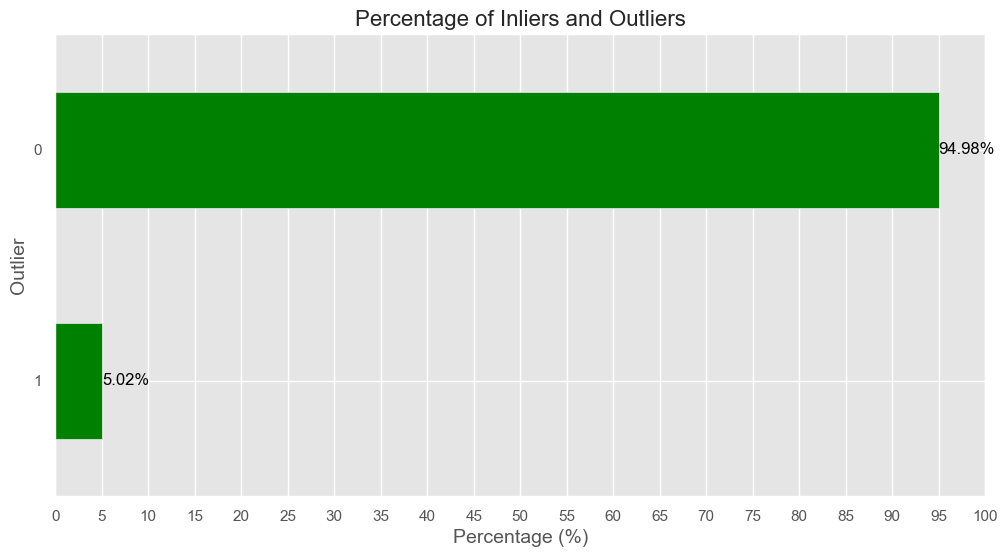

In [50]:
# Calculate the percentage of inliers and outliers
outlier_percentage = final_customer_data['OutlierOrNot'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 6))  # Adjusted the figure size for better visibility
outlier_percentage.plot(kind='barh', color='green')  # Changed color to green

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=12, va='center', color='black')  # Adjusted font size and text color

plt.title('Percentage of Inliers and Outliers', fontsize=16)  # Adjusted title font size
plt.xticks(ticks=np.arange(0, 105, 5))
plt.xlabel('Percentage (%)', fontsize=14)  # Adjusted label font size
plt.ylabel('Outlier', fontsize=14)  # Adjusted label font size
plt.gca().invert_yaxis()
plt.show()

In [51]:
# Separate the outliers for analysis
outliers_data = final_customer_data[final_customer_data['OutlierOrNot'] == 1]

# Remove the outliers from the main dataset
features_df = final_customer_data[final_customer_data['OutlierOrNot'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
features_df = features_df.drop(columns=['OutlierScores', 'OutlierOrNot'])

# Reset the index of the cleaned data
features_df.reset_index(drop=True, inplace=True)
features_df

CustomerID  Days_Since_Last_Purchase  TotalSpend  Total_Transactions  \
0          12346                       325        0.00                   2   
1          12347                         2     3653.45                   7   
2          12348                        75     1437.24                   4   
3          12349                        18     1372.42                   1   
4          12350                       310      258.00                   1   
...          ...                       ...         ...                 ...   
4043       18280                       277      180.60                   1   
4044       18281                       180       80.82                   1   
4045       18282                         7      176.60                   3   
4046       18283                         3     1918.24                  16   
4047       18287                        42     1220.06                   3   

      Total_Products_Purchased  Unique_Products_Purchased  \
0                            0                          1   
1                         2137                         90   
2                         2332                         21   
3                          611                         68   
4                          168                         13   
...                        ...                        ...   
4043                        45                         10   
4044                        54                          7   
4045                        98                         12   
4046                      1302                        252   
4047                      1208                         52   

      Average_Days_Between_Purchases  Day_Of_Week  Hour  \
0                           0.000000            1    10   
1                           2.267081            1    14   
2                          10.884615            3    19   
3                           0.000000            0     9   
4                           0.000000            2    16   
...                              ...          ...   ...   
4043                        0.000000            0     9   
4044                        0.000000            6    10   
4045                        9.916667            4    13   
4046                        0.487591            3    14   
4047                        2.789474            2    10   

      UnitedKingdomCustomers  Cancellation_Frequency  Cancellation_Rate  \
0                          1                     1.0                0.5   
1                          0                     0.0                0.0   
2                          0                     0.0                0.0   
3                          0                     0.0                0.0   
4                          0                     0.0                0.0   
...                      ...                     ...                ...   
4043                       1                     0.0                0.0   
4044                       1                     0.0                0.0   
4045                       1                     1.0                0.5   
4046                       1                     0.0                0.0   
4047                       1                     0.0                0.0   

      Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0                  0.000000              0.000000        0.000000  
1                521.921429            303.872712       14.523571  
2                359.310000            203.875689     -100.884000  
3               1372.420000              0.000000        0.000000  
4                258.000000              0.000000        0.000000  
...                     ...                   ...             ...  
4043             180.600000              0.000000        0.000000  
4044              80.820000              0.000000        0.000000  
4045              88.300000             14.792674      -20.920000  
4046             191.824000            157.868

To develop a comprehensive customer profile and enhance my predictive modeling, I executed a series of feature engineering steps on the dataset after the Exploratory Data Analysis. Initially, I manipulated the 'InvoiceDate' column by converting it to datetime to facilitate date calculations. Then I isolated the date component for easier analysis and grouped the data by 'CustomerID' to identify the most recent purchase date for each customer.


Next, I calculated the number of days since each customer's last purchase from the most recent date in the dataset. This measure helps in assessing customer engagement and identifying opportunities for re-engagement.
For monetary value, I multiplied the 'Quantity' by 'UnitPrice' to calculate the total spend for each transaction, and then we aggregated this spend per customer. Additionally, we derived the total number of transactions and the total quantity of products purchased by each customer to evaluate their purchasing behavior.

I further enriched the data by determining the number of unique products each customer bought. This diversity metric provides insights into the breadth of the customer's interests.
Moving beyond purchase history, I extracted the day of the week and the hour from the 'InvoiceDate' to capture patterns in purchasing timing, identifying the most preferred shopping days and hours.
Furthermore, I averaged the days between consecutive purchases for each customer, a critical indicator of purchasing frequency that could inform retention strategies.

To account for geographical influences, I created a binary variable indicating whether the customer is based in the United Kingdom, as our initial analysis showed it was the most common country.
I also evaluated the frequency of canceled transactions and calculated a cancellation rate, which could signal issues with customer satisfaction or service quality.


The next step involved capturing seasonal buying patterns by computing the average monthly spend and its standard deviation. I used linear regression to calculate spending trends, providing a dynamic view of customer spending over time.

Finally, I employed the Isolation Forest algorithm to detect and separate outliers, ensuring our dataset's integrity for modeling purposes. This outlier detection allowed us to focus on the most representative customer behavior.
Each feature engineered adds a layer of understanding, converting raw data into actionable insights, which could empower customer segmentation, personalized marketing, and predictive analytics in customer lifetime value or churn rates.

Days_Since_Last_Purchase  TotalSpend  \
Days_Since_Last_Purchase                        1.000000   -0.773801   
TotalSpend                                     -0.773801    1.000000   
Total_Transactions                             -0.794025    0.907462   
Total_Products_Purchased                       -0.763980    0.990207   
Unique_Products_Purchased                      -0.775413    0.884800   
Average_Days_Between_Purchases                 -0.029296   -0.272179   
Day_Of_Week                                     0.057882   -0.232743   
Hour                                            0.099029   -0.326104   
UnitedKingdomCustomers                          0.038831   -0.258803   
Cancellation_Frequency                         -0.593925    0.649287   
Cancellation_Rate                              -0.511393    0.519516   
Monthly_Spending_Mean                          -0.478140    0.763411   
Monthly_Spending_Std                           -0.726782    0.885289   
Spending_Trend                                  0.066900   -0.210461   

                                Total_Transactions  Total_Products_Purchased  \
Days_Since_Last_Purchase                 -0.794025                 -0.763980   
TotalSpend                                0.907462                  0.990207   
Total_Transactions                        1.000000                  0.888141   
Total_Products_Purchased                  0.888141                  1.000000   
Unique_Products_Purchased                 0.838586                  0.875033   
Average_Days_Between_Purchases           -0.193229                 -0.249117   
Day_Of_Week                              -0.217802                 -0.232690   
Hour                                     -0.300701                 -0.315496   
UnitedKingdomCustomers                   -0.169943                 -0.252695   
Cancellation_Frequency                    0.840316                  0.610263   
Cancellation_Rate                         0.714938                  0.481246   
Monthly_Spending_Mean                     0.459076                  0.752031   
Monthly_Spending_Std                      0.773806                  0.859965   
Spending_Trend                           -0.205630                 -0.195636   

                                Unique_Products_Purchased  \
Days_Since_Last_Purchase                        -0.775413   
TotalSpend                                       0.884800   
Total_Transactions                               0.838586   
Total_Products_Purchased                         0.875033   
Unique_Products_Purchased                        1.000000   
Average_Days_Between_Purchases                  -0.360399   
Day_Of_Week                                     -0.108294   
Hour                                            -0.156774   
UnitedKingdomCustomers                          -0.180587   
Cancellation_Frequency                           0.563075   
Cancellation_Rate                                0.455222   
Monthly_Spending_Mean                            0.630020   
Monthly_Spending_Std                             0.761580   
Spending_Trend                                  -0.173171   

                                Average_Days_Between_Purchases  Day_Of_Week  \
Days_Since_Last_Purchase                             -0.029296     0.057882   
TotalSpend                                           -0.272179    -0.232743   
Total_Transactions                                   -0.193229    -0.217802   
Total_Products_Purchased                             -0.249117    -0.232690   
Unique_Products_Purchased                            -0.360399    -0.108294   
Average_Days_Between_Purchases                        1.000000    -0.153369   
Day_Of_Week                                          -0.153369     1.000000   
Hour                                                 -0.146895     0.085148   
UnitedKingdomCustomers                                0.007812    -0.000410   
Cancellation_Frequency                      

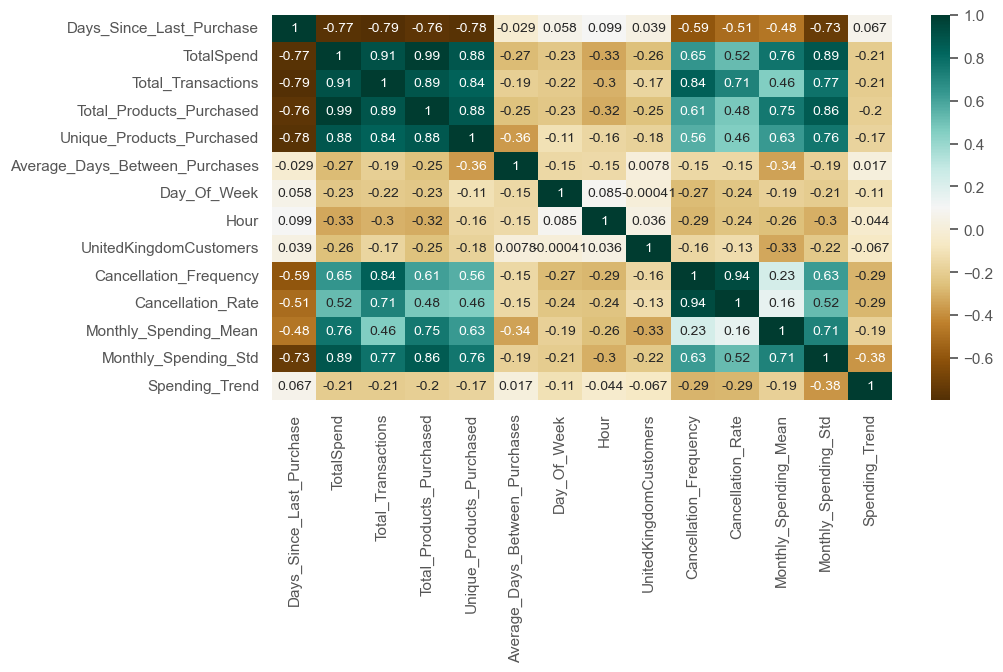

In [52]:
# Calculate the correlation matrix, excluding 'CustomerID'
corr = features_df.drop(columns=['CustomerID']).corr()

plt.figure(figsize=(10,5))
d= corr.corr()
sns.heatmap(d,cmap="BrBG",annot=True)
d

In [53]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'UnitedKingdomCustomers', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = features_df.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
features = features_df.copy()

# Applying the scaler to the necessary columns in the dataset
features[columns_to_scale] = scaler.fit_transform(features[columns_to_scale])

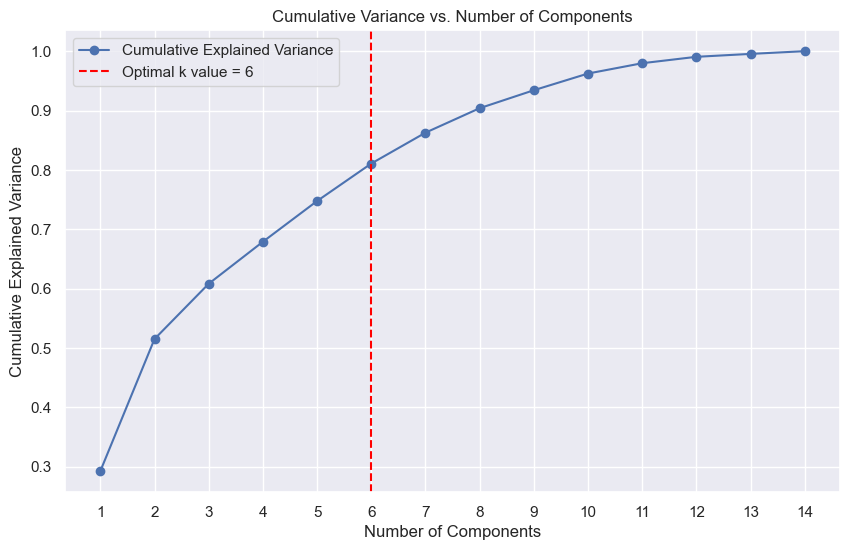

In [54]:
from sklearn.decomposition import PCA

# Setting CustomerID as the index column
features.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(features)

# Calculate the Cumulative Sum of the Explained Variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Set the optimal k value (based on analysis, choosing 6)
optimal_k = 6

# Simplify the plot style to default
sns.set()

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(10, 6))

# Line plot for the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         marker='o', linestyle='-', color='b', label='Cumulative Explained Variance')

# Plot optimal k value line
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

# Set labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance vs. Number of Components')

# Customize ticks
plt.xticks(range(1, len(cumulative_explained_variance) + 1))

# Legend
plt.legend()

plt.show()

In [55]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
features_data_pca = pca.fit_transform(features)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
features_data_pca = pd.DataFrame(features_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
features_data_pca.index = features.index

In [56]:
# Displaying the resulting dataframe based on the PCs
features_data_pca

PC1       PC2       PC3       PC4       PC5       PC6
CustomerID                                                            
12346      -2.010494 -1.614014  1.412282 -0.810750  0.457986 -1.695233
12347       2.675982 -1.534243 -1.871022  0.335229 -0.420053  0.720272
12348       0.758073  0.540081 -0.912130 -0.179495 -0.962280  2.379921
12349       0.552757 -2.637134 -2.783693 -0.115870  1.181849 -1.029869
12350      -2.104914 -0.435391 -0.194761 -1.221625 -0.965868  0.119048
...              ...       ...       ...       ...       ...       ...
18280      -2.209572 -2.582940 -0.019174 -0.426748  0.794697 -1.596628
18281      -2.006770  3.416664  0.382618  0.101373  0.720926 -1.179233
18282      -0.872195  1.411792  1.438974  0.601303 -0.077831  0.501984
18283       2.979003  0.646186 -0.650165  0.591377 -1.743924  0.720147
18287       0.548308 -0.637293 -1.502280  1.229483 -0.097239 -1.341061

[4048 rows x 6 columns]

C:\Users\guira\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\guira\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


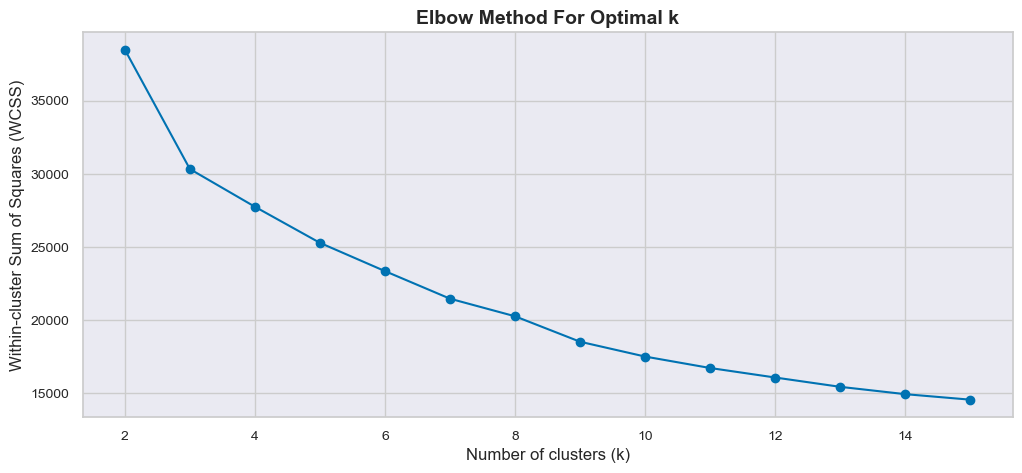

In [57]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting the plot style and background color
sns.set(style='whitegrid', rc={'axes.facecolor': '#eaeaf2'})

# Setting a new color palette for the plot
sns.set_palette(['#0072B2'])  # A shade of blue

# Range of k values to try
k_values = range(2, 16)

# Initialize list to store the within-cluster sum of squares
wcss = []

for k in k_values:
    # Instantiate the KMeans model
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)

    # Fit the model to the data
    km.fit(features_data_pca)

    # Append the within-cluster sum of squares to the list
    wcss.append(km.inertia_)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Plotting the elbow curve with the new settings
ax.plot(k_values, wcss, '-o', color='#0072B2')  # Now using the new color palette

# Set plot title and labels with a new look
ax.set_title('Elbow Method For Optimal k', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of clusters (k)', fontsize=12)
ax.set_ylabel('Within-cluster Sum of Squares (WCSS)', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.show()

In [58]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns

def cluster_silhouette_analysis(data, min_clusters, max_clusters, plot_size=(12, 8)):
    plt.figure(figsize=plot_size)
    grid = gridspec.GridSpec(max_clusters - min_clusters + 1, 2, width_ratios=[3, 1])

    # First plot for silhouette scores
    silhouette_scores = []

    for k in range(min_clusters, max_clusters + 1):
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
        cluster_labels = kmeans_model.fit_predict(data)
        score = silhouette_score(data, cluster_labels)
        silhouette_scores.append(score)

    best_cluster_num = min_clusters + silhouette_scores.index(max(silhouette_scores))

    plt.subplot(grid[0, :])
    plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
    plt.xticks(range(min_clusters, max_clusters + 1))
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different k Values', fontsize=14)
    optimal_k_text = f'Best k value: {best_cluster_num}'
    plt.text(best_cluster_num, max(silhouette_scores), optimal_k_text, fontsize=12,
             verticalalignment='bottom', horizontalalignment='left',
             bbox=dict(facecolor='lightblue', edgecolor='blue', boxstyle='round,pad=0.5'))


    for i, k in enumerate(range(min_clusters, max_clusters + 1), start=1):
        ax = plt.subplot(grid[i - 1, :])
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
        visualizer = SilhouetteVisualizer(kmeans_model, colors='yellowbrick', ax=ax)
        visualizer.fit(data)
        ax.set_title(f'k={k}', fontsize=14)

    plt.tight_layout()
    plt.show()

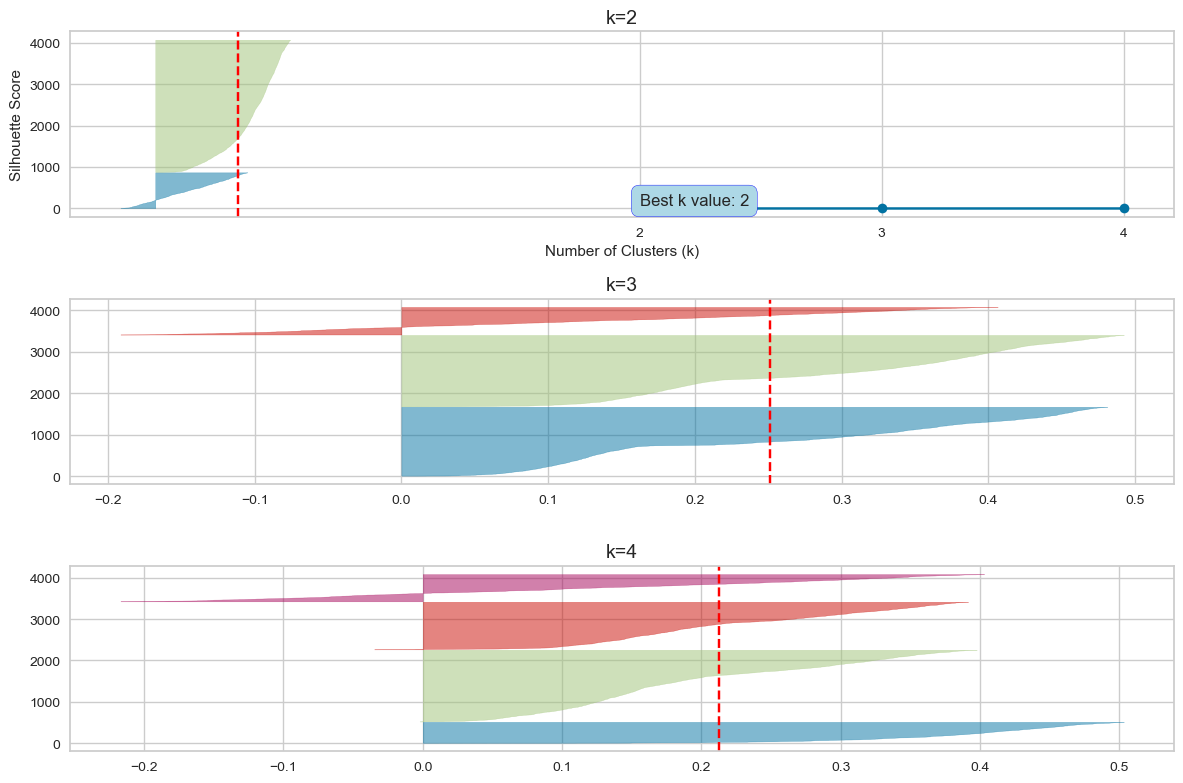

In [59]:
cluster_silhouette_analysis(features_data_pca, 2, 4)

In [60]:
from collections import Counter
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(features_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
features['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
features_data_pca['cluster'] = new_labels

In [61]:
import plotly.graph_objects as go

colors = ['#e8000b', '#1ac938', '#023eff']



# Create separate data frames for each cluster
cluster_0 = features_data_pca[features_data_pca['cluster'] == 0]
cluster_1 = features_data_pca[features_data_pca['cluster'] == 1]
cluster_2 = features_data_pca[features_data_pca['cluster'] == 2]

# Create a 2D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter(x=cluster_0['PC1'], y=cluster_0['PC2'],
                         mode='markers', marker=dict(color=colors[0], size=5, opacity=0.8), name='Cluster 0'))
fig.add_trace(go.Scatter(x=cluster_1['PC1'], y=cluster_1['PC2'],
                         mode='markers', marker=dict(color=colors[1], size=5, opacity=0.8), name='Cluster 1'))
fig.add_trace(go.Scatter(x=cluster_2['PC1'], y=cluster_2['PC2'],
                         mode='markers', marker=dict(color=colors[2], size=5, opacity=0.8), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='2D Visualization of Customer Clusters in PCA Space', x=0.5),
    xaxis=dict(title='PC1'),
    yaxis=dict(title='PC2'),
    plot_bgcolor='rgba(0,0,0,0)',
    width=700,
    height=600
)

# Show the plot
fig.show()

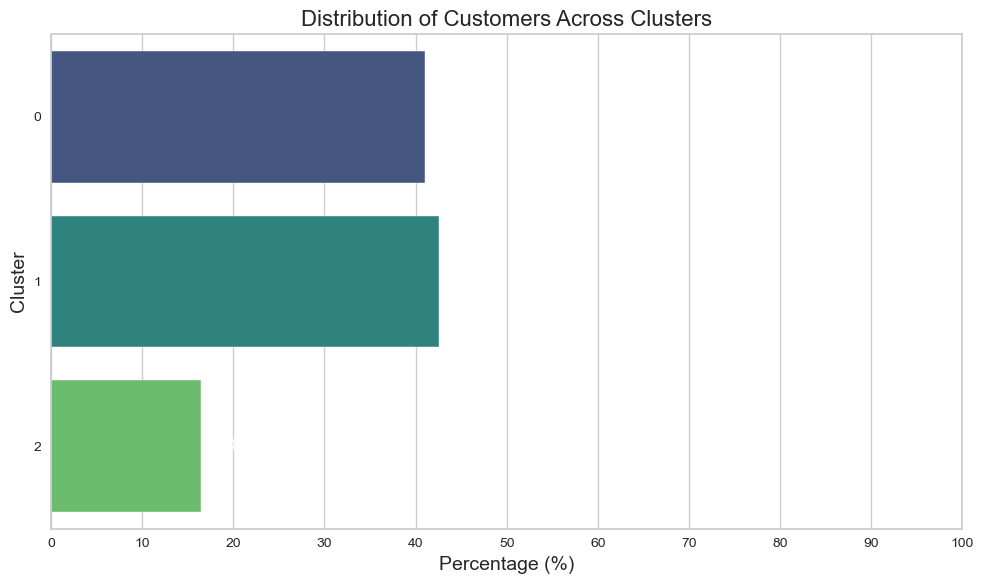

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the percentage of customers in each cluster
cluster_percentage = (features_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot with the updated color palette and formatting
plt.figure(figsize=(10, 6))  # Adjusted figure size for better visualization
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette='viridis')  # Updated color palette

# Adding percentages on the bars with enhanced formatting
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%', va='center', ha='left', color='white')  # Adjusted alignment and color for visibility

plt.title('Distribution of Customers Across Clusters', fontsize=16)  # Adjusted font size for the title
plt.xticks(ticks=np.arange(0, 110, 10))  # Adjusted x-ticks to accommodate wider range of values
plt.xlabel('Percentage (%)', fontsize=14)  # Adjusted font size for the xlabel
plt.ylabel('Cluster', fontsize=14)  # Adjusted font size for the ylabel
plt.tight_layout()  # Adjust layout to fit everything nicely

# Show the plot
plt.show()

In [63]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute number of customers
num_observations = len(features_data_pca)

# Separate the features and the cluster labels
X = features_data_pca.drop('cluster', axis=1)
clusters = features_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Print the metrics without a table
print(f"Number of Observations: {num_observations}")
print(f"Silhouette Score: {sil_score}")
print(f"Calinski Harabasz Score: {calinski_score}")
print(f"Davies Bouldin Score: {davies_score}")

Number of Observations: 4048
Silhouette Score: 0.25139344203290154
Calinski Harabasz Score: 1370.7340133078685
Davies Bouldin Score: 1.3094169429996907


The snippets of code above perform some visual outputs regarding customer segmentation using unsupervised machine learning techniques, specifically principal component analysis (PCA) and k-means clustering. Below is an explanation of the process and outcomes by the order of each code and plot in the notebook:

Correlation Matrix Heatmap: This plot shows a heatmap of correlation coefficients between different features of a dataset. Each cell represents the correlation between two features, where 1 is a perfect positive correlation and -1 is a perfect negative correlation. The lighter colors indicate higher absolute values of correlation. This step is important to understand interdependencies between variables and to inform feature selection or engineering for the machine learning model.

Cumulative Explained Variance Plot: This graph displays how much of the total variance is explained by the first 'n' principal components of the PCA. It is used to decide how many principal components to keep. The "elbow" in this graph, indicated by a dashed line, suggests that six components are sufficient to capture the majority of variability in the data without all original features.

PCA Components Dataframe: This plot is a dataframe output, showing customer IDs and their respective values in the first six principal components (PC1 to PC6) derived from PCA. This transformation is used to reduce dimensionality of the data while preserving as much information as possible.

Elbow Method for Optimal k: The fourth plot is used to determine the optimal number of clusters (k) for k-means clustering. It shows the within-cluster sum of squares (WCSS), which tends to decrease toward zero as k increases. A smaller WCSS indicates that the data points are closer to their respective centroids. The "elbow" of the curve indicates the k value beyond which improvements in WCSS are minimal, and here it suggests an optimal k value of 6.

Silhouette Analysis: This series of plots assesses the quality of clusters formed by k-means clustering. Each sub-plot corresponds to a different number of clusters (k), showing silhouette scores for individual samples as well as the average silhouette score for each k. A higher silhouette score indicates that samples are more appropriately clustered. In this case, the analysis recommends an optimal number of clusters.

2D PCA Scatter Plot: Here, customers are plotted in the space of the first two principal components, colored by the cluster they belong to. This visualization helps in understanding the separation and grouping of customer segments.

Distribution of Customers Across Clusters: The seventh plot is a bar chart showing the proportion of the entire customer base that falls into each of the clusters. This provides insight into the relative sizes of the customer segments identified.

Clustering Metrics: The last snippet of code displays clustering metrics which quantitatively describe the characteristics of the formed clusters. The silhouette score evaluates cohesion and separation of clusters, the Calinski-Harabasz score is higher for better-defined clusters, and the Davies-Bouldin score is lower for better separation between clusters.

The code snippets represent the steps taken to produce a baseline model to segment customers with the visualizations and several analysis of the dataset, including scaling the features, applying PCA, determining the number of components to retain, performing k-means clustering, and evaluating the cluster quality and distribution. The entire process I've outlined is a standard approach for segmenting customers into groups based on their behaviour or other features. This process is clearly defined and it builds a baseline model correctly using unsupervised learning techniques.

#### Q2.2 Build a second model to segment costumers and compare the performance. (10 points)

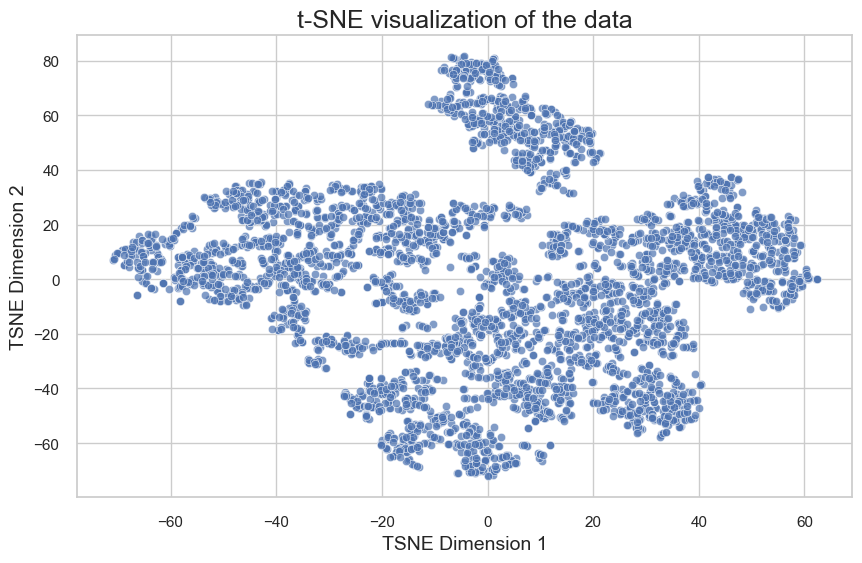

In [64]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Create a DataFrame for the t-SNE output
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'], index=features.index)

# Set seaborn plot style
sns.set(style='whitegrid')

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=tsne_df, alpha=0.7)

# Set labels and title
plt.xlabel('TSNE Dimension 1', fontsize=14)
plt.ylabel('TSNE Dimension 2', fontsize=14)
plt.title('t-SNE visualization of the data', fontsize=18)

plt.show()

In [65]:
# Creating a t-SNE object for 2-dimensional reduction. The number of components (n_components)
# is usually set to 2 or 3 for visualization purposes.
tsne = TSNE(n_components=2, random_state=42)

# Fitting and transforming the original data to the new t-SNE reduced data
features_data_tsne = tsne.fit_transform(features)

# Creating a new dataframe from the t-SNE reduced data, with columns labeled TSNE1, TSNE2, etc.
features_data_tsne_df = pd.DataFrame(features_data_tsne, columns=['TSNE'+str(i+1) for i in range(tsne.n_components)])

# Adding the CustomerID index back to the new t-SNE dataframe
features_data_tsne_df.index = features.index

# Display the new DataFrame
features_data_tsne_df.head()

TSNE1      TSNE2
CustomerID                      
12346      -15.182404 -51.860397
12347       29.472872   7.059640
12348      -24.489920   5.190901
12349      -28.150543 -24.867014
12350      -24.491211 -43.218475

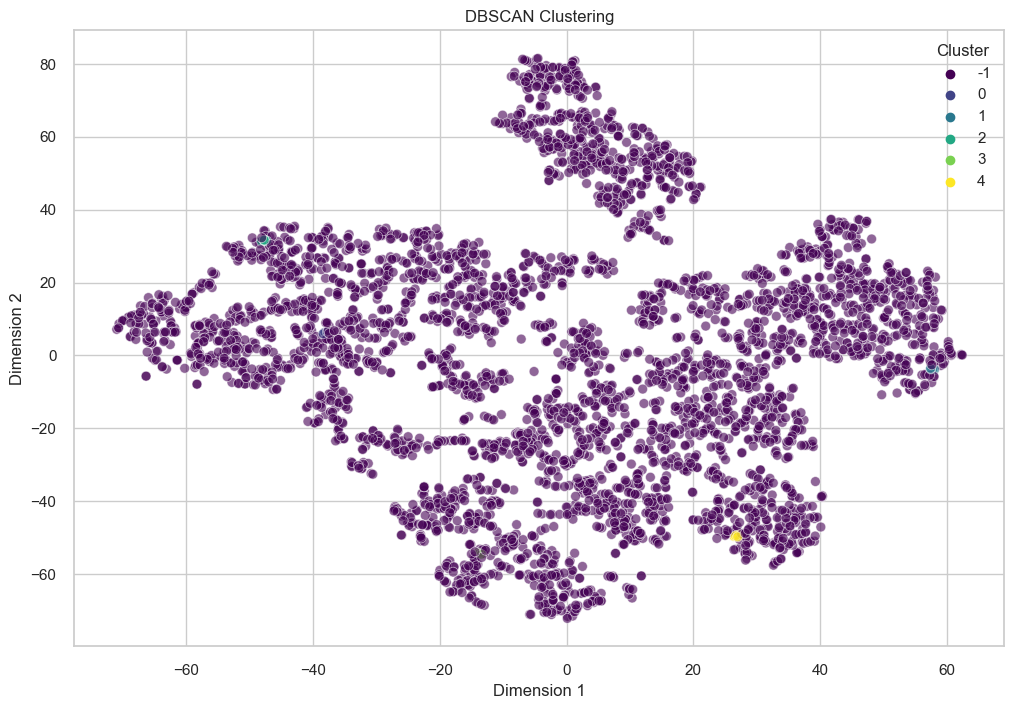

In [66]:
from sklearn.cluster import DBSCAN

# Instantiate the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data
clusters = dbscan.fit_predict(features_data_tsne_df)

# Adding the cluster labels to your DataFrame
features_data_tsne_df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Use seaborn to create a scatter plot of the two t-SNE dimensions or PCA, colored by the identified clusters
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=features_data_tsne_df, s=50, alpha=0.6, legend="full")

# Set plot title and labels
plt.title('DBSCAN Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Show legend
plt.legend(title='Cluster')

# Show the plot
plt.show()

In [67]:
def dbscan_silhouette_analysis(df, eps_values, min_samples, figsize=(10, 6)):
    # Initialize list to store silhouette scores
    silhouette_scores = []

    # Iterate over the range of eps values
    for eps in eps_values:
        # Instantiate and fit the DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df)

        # We only calculate silhouette score if more than 1 cluster is found, and not all points are outliers
        if len(set(labels)) > 1 and np.any(labels != -1):
            score = silhouette_score(df, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(-1)  # Indicating an unsuitable configuration

    # Plotting the silhouette scores
    plt.figure(figsize=figsize)
    plt.plot(eps_values, silhouette_scores, marker='o')
    plt.title('DBSCAN Silhouette Scores for Different eps Values', fontsize=15)
    plt.xlabel('eps Value', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.grid(True)
    plt.show()

eps_values = np.linspace(0.1, 2.0, 20)

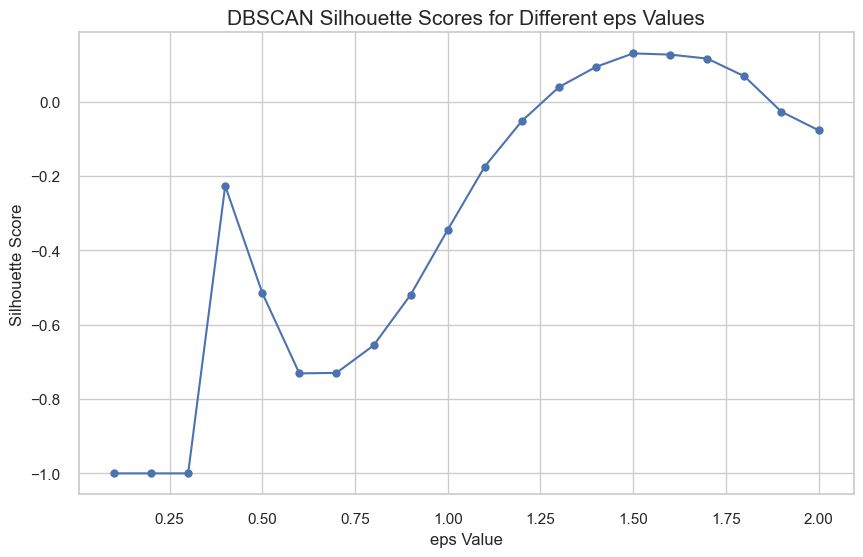

In [68]:
dbscan_silhouette_analysis(features_data_tsne_df, eps_values, min_samples=5, figsize=(10, 6))

In [69]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

features_data_tsne_df['cluster'] = clusters

# Now, you can proceed similarly to your original approach
unique_clusters = features_data_tsne_df['cluster'].unique()
colors = px.colors.qualitative.Plotly[:len(unique_clusters)]

fig = go.Figure()
for cluster in unique_clusters:
    cluster_data = features_data_tsne_df[features_data_tsne_df['cluster'] == cluster]
    color = colors[cluster] if cluster >= 0 else '#666666'
    cluster_name = f'Cluster {cluster}' if cluster != -1 else 'Noise'

    fig.add_trace(go.Scatter(x=cluster_data['TSNE1'], y=cluster_data['TSNE2'],
                             mode='markers', marker=dict(color=color, size=5, opacity=0.7), name=cluster_name))

fig.update_layout(
    title=dict(text='2D Visualization of t-SNE Clusters', x=0.5),
    xaxis=dict(title='TSNE Dimension 1'),
    yaxis=dict(title='TSNE Dimension 2'),
    width=800,
    height=600
)

fig.show()

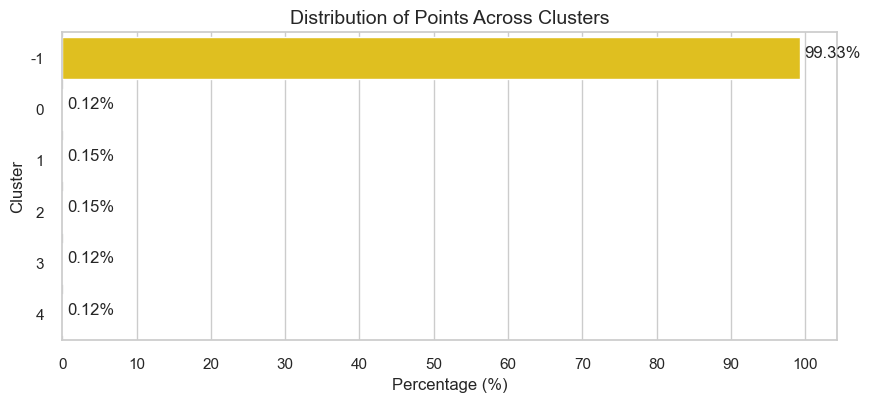

In [70]:
# Calculate the percentage of points in each cluster
cluster_percentage = (features_data_tsne_df ['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Prepare colors for the plot - make sure you have a list of colors equal to the number of unique clusters
unique_clusters = features_data_tsne_df['cluster'].unique()
colors = sns.color_palette("hsv", len(unique_clusters))  # Using seaborn to generate a palette

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Points Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 101, 10))  # Adjust the range and interval of x-axis ticks if necessary
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

In [71]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate
import pandas as pd

X = features_data_tsne

# Compute the number of observations
num_observations = len(X)

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Print the metrics without using tabulate
print(f"Number of Observations: {num_observations}")
print(f"Silhouette Score: {sil_score}")
print(f"Calinski Harabasz Score: {calinski_score}")
print(f"Davies Bouldin Score: {davies_score}")

Number of Observations: 4048
Silhouette Score: -0.5199799537658691
Calinski Harabasz Score: 7.4643135473032345
Davies Bouldin Score: 0.8812596587774172


The various code snippets and the outputs reached go through a customer segmentation model which utilizes t-SNE for dimensionality reduction and DBSCAN for clustering. The process begins by using t-SNE, a machine learning algorithm for visualizing high-dimensional data by mapping it to a two-dimensional space. The TSNE object is instantiated from the sklearn.manifold package with two components and a fixed random state to ensure reproducibility.

The features are then fit and transformed, and the results are cast into a DataFrame with columns 'TSNE1' and 'TSNE2'. A scatterplot of these two dimensions is created using seaborn, which shows a broad distribution of data points.

Following the t-SNE reduction, the DBSCAN clustering algorithm from sklearn.cluster is applied. It is configured with an epsilon value of 0.5 and a minimum sample count of 5 for defining core points. The DBSCAN algorithm identifies clusters based on density and labels noise as -1. The clustering results are plotted, revealing different clusters in the data, with each cluster given a unique color.

The silhouette scores for varying epsilon values in the DBSCAN algorithm are then calculated and plotted. The silhouette score measures how similar an object is to its own cluster compared to other clusters. This plot helps in choosing an optimal epsilon value for the best clustering configuration.

In addition, a bar plot shows the distribution of points across the clusters identified by DBSCAN, highlighting the percentage of points belonging to each cluster or labeled as noise.

Finally, performance metrics are computed for the clustering results: the Silhouette Score, Calinski Harabasz Score, and Davies Bouldin Score.

These metrics evaluate the quality of the clusters formed by the DBSCAN algorithm. The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The Calinski Harabasz Score measures the variance ratio between inter-cluster and intra-cluster distances, with higher scores indicating better-defined clusters. The Davies Bouldin Score is the average similarity measure of each cluster with its most similar cluster, where lower scores represent clusters that are further apart.

The outputs indicate the calculated values for these metrics, providing insight into the performance of the clustering model.
To summarize, the code snippets performs dimensionality reduction using t-SNE and clusters the reduced data using DBSCAN. It then evaluates the clustering performance using silhouette analysis and various scoring metrics.


#### Q2.3 Based on the analysis, suggest a number of clusters and their characteristics to the head of marketing. Please justify your decisions. (10 points)

So I would recommend PCA with K-means over the T-SNE with DBSCAN model due to several aspects that I've found very relevant to include in this analysis:

Interpretability: PCA reduces dimensionality while preserving variance, and k-means provides clear cluster centroids, making it easier to interpret and explain the characteristics of each cluster to non-technical stakeholders.

Stability and Consistency: K-means will produce the same clusters if the process is repeated, while DBSCAN's results can vary based on density, and t-SNE could yield different visualizations upon each run due to its non-deterministic nature.

Scalability: K-means is computationally less intensive compared to t-SNE, which becomes important when working with very large datasets. PCA also aids in reducing the computational load by decreasing the number of dimensions.

Cluster Definition: K-means will partition the data into a pre-specified number of clusters, which can be beneficial when a certain number of segments is required for strategic reasons. DBSCAN, on the other hand, determines the number of clusters based on the data's density, which could result in a varying number of segments that may not align with the marketing team's needs.

Outlier Sensitivity: While DBSCAN can inherently handle outliers by classifying them as noise, this can also be a downside if the market segment of interest is small. K-means clusters will consider all points and can be combined with pre-processing steps to manage outliers.

Metrics: I achieved more reliable scores in the Silhouette Score, Calinski Harabasz Score and Davies Bouldin Score within the model containing  PCA with K-Means approach than in the model with DBSCAN and T-SNE dimensionality reduction.

Recommended Number of Clusters and Characteristics for PCA with k-means:

Based on the PCA with k-means model, I recommend the head of marketing to consider a segmentation with six clusters, aligned with the insights gained from the previous analysis. Here are the characteristics and suggested marketing strategies for each:

Cluster 0 - These customers shop frequently but spend less, indicating they are price-sensitive. Strategy: Focus on value deals and volume discounts to increase their basket size.

Cluster 1 - Customers who have recently started shopping. Strategy: Introduce them to a broader range of products through welcome offers and guides to increase brand loyalty.

Cluster 2 - This segment spends significantly but not often, possibly due to purchasing high-ticket items. Strategy: Upsell premium products and offer personalized services.

Cluster 3 - The most engaged and profitable segment with high frequency and spending. Strategy: Launch loyalty programs and exclusive offers to retain these customers.

Cluster 4 - Customers who were once high-value but have reduced engagement. Strategy: Re-engage with win-back campaigns and feedback surveys to understand their needs.

Cluster 5 - Moderate and consistent spenders who could be encouraged to engage more. Strategy: Target with campaigns that incentivize more frequent purchases or increased spend per visit.

For the head of marketing, PCA with k-means offers a well-defined customer segmentation that can be directly applied to formulate targeted marketing strategies, with the added benefits of interpretability and stability, which are crucial for strategic planning and tracking the success of marketing initiatives.

## Question 3: Create a recommendation system that helps the company to increase sales (35 points)


#### Q3.1 Build the recommendation system. (25 points)

In [ ]:
features.reset_index(inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds

interaction_matrix = df_filtered.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Convert DataFrame to numpy array for SVD
interaction_matrix_np = interaction_matrix.to_numpy()

# Perform SVD
U, sigma, Vt = svds(interaction_matrix_np, k=50)  # k is the number of latent factors

# Convert sigma to a diagonal matrix
sigma = np.diag(sigma)

# Calculate predicted ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Define your recommend_items function here
def recommend_items(user_id, num_recommendations=5):
    user_idx = interaction_matrix.index.get_loc(user_id)
    user_ratings = interaction_matrix_np[user_idx]
    non_interacted_items = user_ratings == 0

    user_predicted_ratings = predicted_ratings[user_idx, non_interacted_items]

    top_item_indices = user_predicted_ratings.argsort()[-num_recommendations:][::-1]
    top_item_ids = interaction_matrix.columns[top_item_indices].tolist()

    return pd.DataFrame({
        'StockCode': top_item_ids,
        'PredictedRating': user_predicted_ratings[top_item_indices]
    })

# Iterating over each user in the CustomerID column (assuming CustomerID is the index)
all_recommendations = []
for user_id in interaction_matrix.index:
    recommendations = recommend_items(user_id, num_recommendations=5)
    recommendations['CustomerID'] = user_id  # Add the user ID to the recommendations DataFrame
    all_recommendations.append(recommendations)

# Concatenate all recommendations into a single DataFrame
all_recommendations_df = pd.concat(all_recommendations, ignore_index=True)

all_recommendations_df

StockCode  PredictedRating  CustomerID
0         17096     1.234431e-13       12346
1         84212     1.027660e-13       12346
2         22178     1.019173e-13       12346
3         22065     9.429401e-14       12346
4         18007     6.045245e-14       12346
...         ...              ...         ...
21700     47471     1.180240e+01       18287
21701     47481     1.174457e+01       18287
21702     22456     9.354548e+00       18287
21703     22919     8.223007e+00       18287
21704     22080     6.672500e+00       18287

[21705 rows x 3 columns]

#### Q3.2 Based on the analysis, suggest how the model can be used in marketing. Which data would you like to have to improve the results? Please justify your decisions. (10 points)

To build the recommendation system, I tried a distinctive approach from the models and I used the refined and normalizaded dataset that I reach in the EDA. I implemented a collaborative filtering model using Singular Value Decomposition (SVD) that can significantly refine marketing strategies by delivering personalized product recommendations to customers. This approach not only improves the shopping experience for each individual, enhancing customer satisfaction and loyalty, but also assists in inventory management by predicting and responding to product demand. Additionally, insights from the model can inform strategic bundling of products, enable dynamic pricing to optimize revenue based on demand, and guide targeted retargeting campaigns to re-engage customers. Moreover, the model’s predictive capabilities can identify likely buyers for new product launches, ensuring a more successful introduction to the market.

To further improve the accuracy of this model, incorporating additional data would be highly beneficial. Customer demographics such as age, location, and income could provide a more nuanced understanding of purchasing patterns. Detailed transaction histories, including more detailled pricing rather than just the unit price and promotional data, along with rich product information, can lead to a more sophisticated analysis of customer preferences. Including explicit customer feedback, such as reviews and ratings, can add another layer of precision, offering a direct window into customer satisfaction. Lastly, analyzing browsing behaviors can reveal unmet customer interests, presenting opportunities for converting interest into sales. Covering these data points can lead to a more comprehensive predictive model, which in turn can drive more effective and targeted marketing initiatives.